![Vanguard](datasets/vanguard.png) 
## ASSET BACKED SECURITIES - AUTO FINANCE LOAN DEFAULT PREDICTION

### What is an Asset-Backed Security
An asset-backed security (ABS) is a financial security collateralized by a pool of assets such as loans, leases, credit card debt, royalties or receivables. For investors, asset-backed securities are an alternative to investing in corporate debt. An ABS is similar to a mortgage-backed security, except that the underlying securities are not mortgage-based.

Asset-backed securities allow issuers to generate more cash, which, in turn, is used for more lending while giving investors the opportunity to invest in a wide variety of income-generating assets. Usually, the underlying assets of an ABS are illiquid and can't be sold on their own. But pooling the assets together and creating a financial security, a process called securitization, enables the owner of the assets to make them marketable. The underlying assets of these pools may be home equity loans, automobile loans, credit card receivables, student loans or other expected cash flows. Issuers of ABS can be as creative as they desire. For example, ABS have been created based on cash flows from movie revenues, royalty payments, aircraft leases and solar photovoltaics. Just about any cash-producing situation can be securitized into an ABS.

### Example of Asset-Backed Security
Assume that Company X is in the business of making automobile loans. If a person wants to borrow money to buy a car, Company X gives that person the cash, and the person is obligated to repay the loan with a certain amount of interest. Perhaps Company X makes so many loans that it runs out of cash to continue making more loans. Company X can then package its current loans and sell them to Investment Firm X, thus receiving cash that it can use to make more loans.

Investment Firm X will then sort the purchased loans into different groups called tranches. These tranches are groups of loans with similar characteristics, such as maturity, interest rate and expected delinquency rate. Next, Investment Firm X will issue securities that are similar to typical bonds on each tranche it creates.

Individual investors then purchase these securities and receive the cash-flows from the underlying pool of auto loans, minus an administrative fee that Investment Firm X keeps for itself.

### Typical Tranches
Usually an ABS will have three tranches: class A, B and C. The senior tranche, A, is almost always the largest tranche and is structured to have an investment-grade rating to make it attractive to investors.

The B tranche has lower credit quality and thus has a higher yield than the senior tranche. The C tranche has a lower credit rating than the B tranche and might have such poor credit quality that it can't be sold to investors. In this case, the issuer would keep the C tranche and absorb the losses.


### Vanguard Use Case 
To predict loan default based on public data from SEC and additional economic data

![Auto Loans](datasets/saupload_US-auto-loans-2017-Q1.png)

### Import Libraries

In [1]:
import re
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Input, Dense, Dropout, LSTM, GRU
# from keras.models import Model, load_model
# from keras.callbacks import ModelCheckpoint, TensorBoard
# from keras import regularizers
# tf.__version__
%matplotlib inline

import seaborn as sns
# import itertools
# import operator
# import collections
# from scipy.io import mmread, mmwrite
# from random import randint
# from sklearn import linear_model
# from sklearn.grid_search import GridSearchCV
# from sklearn import preprocessing as pp
# from sklearn.svm import SVR
# from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.decomposition import PCA, KernelPCA
# from sklearn.decomposition import NMF
# from sklearn.pipeline import Pipeline
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
# import scipy.stats as stats
# from sklearn import tree
# from sklearn.feature_selection import f_regression
# from sklearn.gaussian_process import GaussianProcess
# from sklearn.metrics import roc_auc_score
# from sklearn import metrics

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, precision_recall_curve
# from sklearn.metrics import recall_score, classification_report, auc, roc_curve
# from sklearn.metrics import precision_recall_fscore_support, f1_score
# from sklearn.preprocessing import StandardScaler
# import warnings
# warnings.filterwarnings('ignore')

### Model Name

In [ ]:
name = "ABS_Keras-GRU254GRU128D32D2-adam{}".format(int(time.time()))
#name_noTime = "ABS_Keras-LSTM128LSTM128D32D2-adam"

### Default Parameters

In [2]:
#parameters to choose
default_days = 0
#nrows = 40_000_000
train_split = 0.80
model_type = 'scikit-learn'
path = 'c:/users/ugy1/abs/'
#rows_for_prediction = 1000
cutOffForOriginationDate='2012-01-01'
manualOversamplingFactor=0.0
epochs=1

### Features to Be Used from Data

In [3]:
# columns to be used
use_list=[
    'abs_loan.cik',
 #'abs_loan.accessionnumber',
 #'abs_loan.assettypenumber',
 'abs_loan.assetnumber',
 'abs_loan.reportingperiodbeginningdate',
 'abs_loan.reportingperiodendingdate',
 'abs_loan.originatorname',
 'abs_loan.originationdate',
 'abs_loan.originalloanamount',
 'abs_loan.originalloanterm',
 'abs_loan.loanmaturitydate',
 'abs_loan.originalinterestratepercentage',
 #'interestcalculationtypecode',
 #'originalinterestratetypecode',
 #'originalinterestonlytermnumber',
 'abs_loan.originalfirstpaymentdate',
 'abs_loan.underwritingindicator',
 'abs_loan.graceperiodnumber',
 #'paymenttypecode',
 'abs_loan.subvented',
 #'vehiclemanufacturername',
 #'vehiclemodelname',
 'abs_loan.vehiclenewusedcode',
 #'vehiclemodelyear',
 'abs_loan.vehicletypecode',
 #'vehiclevalueamount',
 #'vehiclevaluesourcecode',
 'abs_loan.obligorcreditscoretype',
 'abs_loan.obligorcreditscore',
 'abs_loan.obligorincomeverificationlevelcode',
 'abs_loan.obligoremploymentverificationcode',
 'abs_loan.coobligorindicator',
 'abs_loan.paymenttoincomepercentage',
 #'obligorgeographiclocation',
 'abs_loan.assetaddedindicator',
 #'remainingtermtomaturitynumber',
 'abs_loan.reportingperiodmodificationindicator',
 'abs_loan.servicingadvancemethodcode',
 'abs_loan.reportingperiodbeginningloanbalanceamount',
 'abs_loan.nextreportingperiodpaymentamountdue',
 'abs_loan.reportingperiodinterestratepercentage',
 'abs_loan.nextinterestratepercentage',
 'abs_loan.servicingfeepercentage',
 'abs_loan.servicingflatfeeamount',
 'abs_loan.otherservicerfeeretainedbyservicer',
 'abs_loan.otherassesseduncollectedservicerfeeamount',
 'abs_loan.scheduledinterestamount',
 'abs_loan.scheduledprincipalamount',
 'abs_loan.otherprincipaladjustmentamount',
 'abs_loan.reportingperiodactualendbalanceamount',
 'abs_loan.reportingperiodscheduledpaymentamount',
 'abs_loan.totalactualamountpaid',
 'abs_loan.actualinterestcollectedamount',
 'abs_loan.actualprincipalcollectedamount',
 'abs_loan.actualothercollectedamount',
 'abs_loan.serviceradvancedamount',
 'abs_loan.interestpaidthroughdate',
 'abs_loan.zerobalanceeffectivedate',
 'abs_loan.zerobalancecode',
 'abs_loan.currentdelinquencystatus',
 #'primaryloanservicername',
 #'mostrecentservicingtransferreceiveddate',
 #'assetsubjectdemandindicator',
 #'assetsubjectdemandstatuscode',
 #'repurchaseamount',
 #'demandresolutiondate',
 #'repurchasername',
 #'repurchasereplacementreasoncode',
 #'chargedoffprincipalamount',
 #'recoveredamount',
 #'modificationtypecode',
 #'paymentextendednumber',
 #'repossessedindicator',
 #'repossessedproceedsamount'
]

### GPU Options

In [ ]:
#set gpu options to adjust gpu usage
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
# sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

### Load data

In [4]:
#load data from tab delimited file
df=pd.read_csv(path+'prod/abs_loan_Dec_to_Sep.csv', 
               usecols=use_list, 
               sep='\t',
               #compression=bz2,
               #nrows=nrows,
               low_memory=False, 
              #index_col='abs_loan.reportingperiodendingdate', 
               parse_dates=True
              )

#remove 'abs_loan.' string from columns because 'dot' is a command in pandas
df.columns=df.columns.str.replace('abs_loan.','')

#display data shape
print(df.shape)
#view first five rows of all columns
#df.head(n=5)

(40789594, 47)


### Analyse and Delete Duplicate Data

In [ ]:
#df.cik.unique()

In [ ]:
#df.assetnumber.unique()

In [ ]:
#df.duplicated(subset=['cik','assetnumber']).sum()

In [ ]:
#df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate','originationdate']).sum()

In [ ]:
#df.loc[df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate']),:]

In [ ]:
#df.duplicated().sum()

In [5]:
df.drop_duplicates(subset=['cik','assetnumber','reportingperiodendingdate','originationdate'],keep='last', inplace=True)

In [6]:
#df.columns.tolist()
df.shape

(39324740, 47)

### Dataframe Memory Usage and Datatypes

In [ ]:
#df.info(memory_usage='deep')

In [ ]:
df.memory_usage(deep=True).sum()

In [ ]:
df.dtypes

In [ ]:
#df.head()
#df=df.sort_values(by='originationdate', ascending=True)

### Function to Draw Bar chart

In [6]:
#function to draw a bar chart 
def draw(data, title, ylabel, sort = False, n=-1):
    labels = pd.value_counts(data).head().index.tolist()
    count_classes = pd.value_counts(data, sort).head()
    count_classes.plot(kind = 'bar', rot=0)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print('Top ',n,' counts: ','\n',pd.value_counts(data, sort).head(n))

### Reporting Period
we have taken reportingperiodendingdate as a proxy for the reporting period

Missing values in the reporting period

In [7]:
df.reportingperiodendingdate.isna().mean()

0.0

In [9]:
df.reportingperiodendingdate.dropna(inplace=True)

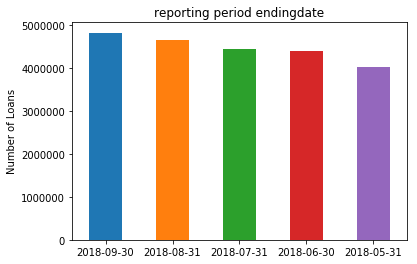

Top  100  counts:  
 2018-09-30    4830178
2018-08-31    4652828
2018-07-31    4441062
2018-06-30    4407679
2018-05-31    4035700
2018-04-30    3755105
2018-03-31    3660354
2018-02-28    3280162
2018-01-31    3185033
2017-12-31    2941041
2018-09-28     135598
Name: reportingperiodendingdate, dtype: int64


In [8]:
draw(df.reportingperiodendingdate, title='reporting period endingdate', ylabel='Number of Loans', sort = True, n=100)

In [9]:
df.reportingperiodendingdate.unique()

array(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2017-12-31', '2018-09-28'], dtype=object)

In [10]:
df['reportingperiodendingdate']=df.reportingperiodendingdate.replace('2018-09-28','2018-09-30')

In [ ]:
# restrict data to a reporting period
#df=df[df.index=='2017-11-30']

In [11]:
df.reportingperiodendingdate.unique()

array(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2017-12-31'], dtype=object)

### Mean current deliquency days for the reporting period

In [12]:
df.currentdelinquencystatus.isna().mean()

0.02539739614298785

In [13]:
df.dropna(subset=['currentdelinquencystatus'], how='all', inplace=True)

In [14]:
df.currentdelinquencystatus.isna().mean()

0.0

In [15]:
df.currentdelinquencystatus.unique()

array([  0.,   2.,  14.,   1.,   8.,   7.,  16.,   6.,   4.,   5.,   3.,
         9.,  11.,  10.,  18.,  47.,  32.,  26.,  23.,  13.,  37.,  12.,
        33.,  19.,  20.,  17.,  24.,  15.,  52.,  27.,  41.,  21.,  28.,
        45.,  25.,  68.,  31.,  22.,  29.,  39.,  49.,  90.,  34.,  30.,
        46.,  83.,  42.,  44.,  59.,  76.,  57.,  82.,  43.,  40.,  72.,
        61.,  48.,  35.,  78.,  62.,  38.,  36.,  75.,  53.,  60.,  51.,
        81.,  50.,  71.,  89.,  73.,  74.,  56., 118., 103.,  85.,  54.,
       104.,  80., 100., 109.,  79.,  77., 149., 134.,  91., 101.,  55.,
       135.,  63.,  95.,  67., 121., 123., 117.,  88.,  96., 105.,  69.,
        97.,  58., 151., 102., 175.,  66., 164.,  92.,  93.,  84., 110.,
        64., 107., 128., 136., 182.,  86., 195.,  70., 112.,  99., 115.,
       139., 130.,  65., 212., 120., 179., 166., 116., 198., 127., 140.,
       152., 160., 106., 184., 111., 143., 210.,  87.,  98., 171.,  -9.,
       132., 137., 173., 124., 129.,  -1., 138., 11

In [16]:
# retaining only loans with non-negative currentdelinquencystatus days
u=pd.value_counts(df.currentdelinquencystatus<0)
if len(u)<2:
    print('No Loans Below zero current deliquency status days')
else: 
    print('Number of Loans with negative current deliquency status days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative current deliquency status days')
    df=df[df.currentdelinquencystatus>=0]

Number of Loans with negative current deliquency status days : 4
Dropping  4 rows and retaining loans with only non-negative current deliquency status days


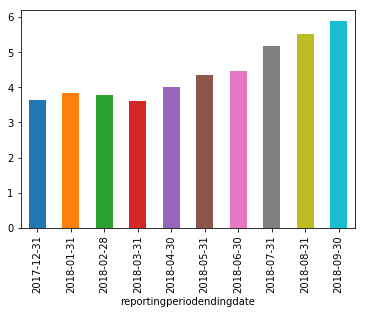

In [17]:
df.groupby(df.reportingperiodendingdate).currentdelinquencystatus.mean().plot(kind='bar')

### Mean reporting period ending balance

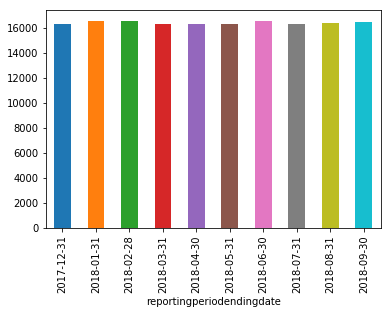

In [18]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean().plot(kind='bar')

### Actual end balance amount for all current delinquency status days by reporting period

reportingperiodendingdate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

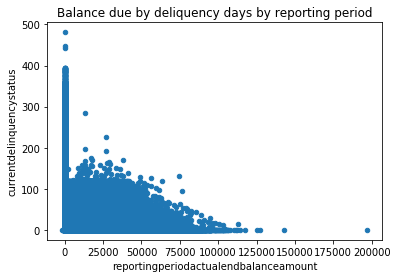

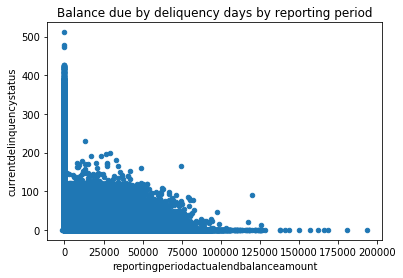

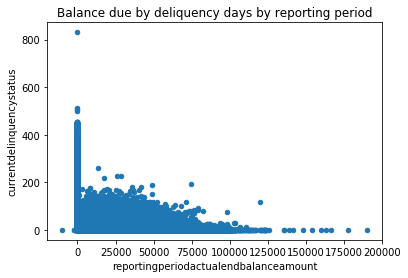

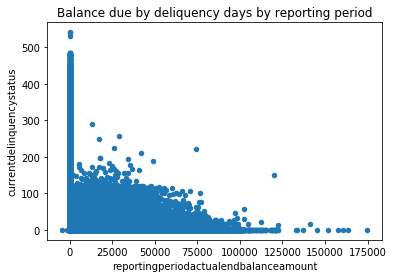

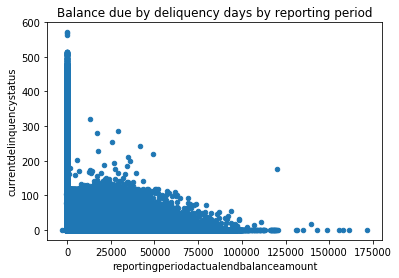

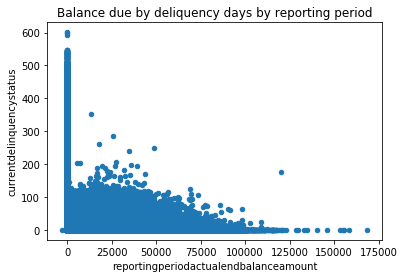

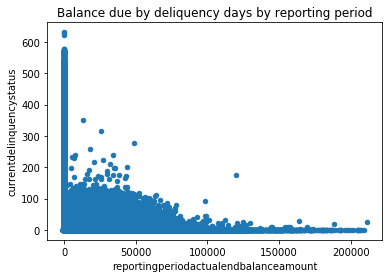

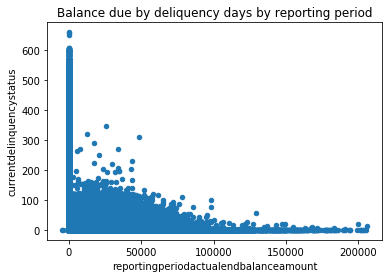

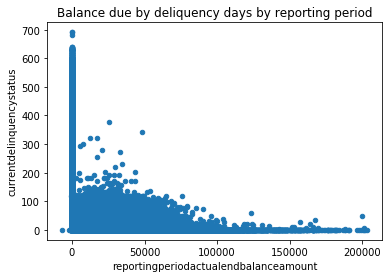

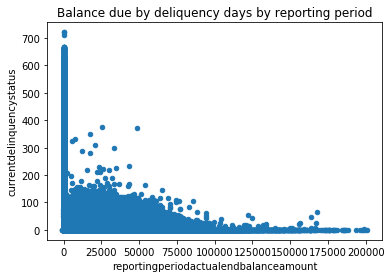

In [19]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='reportingperiodactualendbalanceamount',y='currentdelinquencystatus', title='Balance due by deliquency days by reporting period')

### Creating Feature columns for Reporting period

In [20]:
# create feature columns for categories within originator name 
def map_reportingperiodendingdate(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.reportingperiodendingdate).index.tolist()

for code in codes:
        df['reportingperiodending_{}'.format(code)] = list(map(map_reportingperiodendingdate, df.reportingperiodendingdate))
        print('Added Column for :   reportingperiodending_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   reportingperiodending_2018-09-30
Added Column for :   reportingperiodending_2018-08-31
Added Column for :   reportingperiodending_2018-07-31
Added Column for :   reportingperiodending_2018-06-30
Added Column for :   reportingperiodending_2018-05-31
Added Column for :   reportingperiodending_2018-04-30
Added Column for :   reportingperiodending_2018-03-31
Added Column for :   reportingperiodending_2018-02-28
Added Column for :   reportingperiodending_2018-01-31
Added Column for :   reportingperiodending_2017-12-31
New Dataframe shape :  (38325990, 57)


### Calculating Number of Days Loans Outstanding and creating a feature column

In [21]:
#calculate outstanding days
df['outstandingdays'] = pd.to_datetime(df['reportingperiodendingdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
#draw(df.outstandingdays, title='Outstanding Days', ylabel='Number of Loans', sort = True, n=5)
#remove days string for machine learning
df['outstandingdays']=df.outstandingdays.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
#df.outstandingdays.tail()

### current deliquency status days Vs Loan Outstanding days by the reporting period

reportingperiodendingdate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

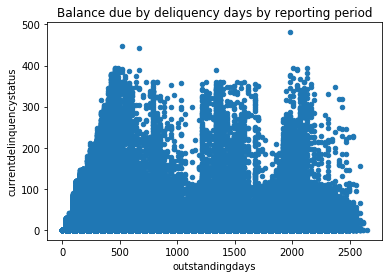

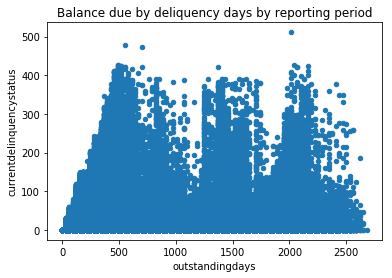

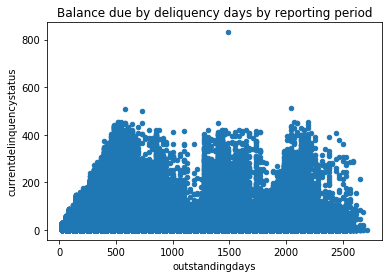

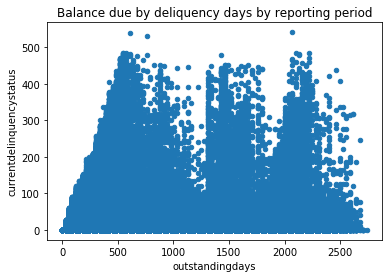

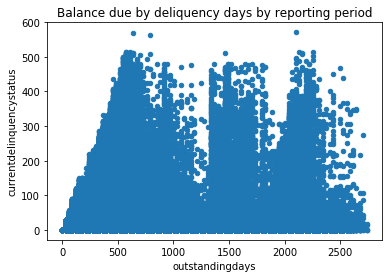

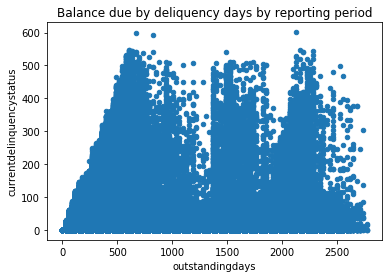

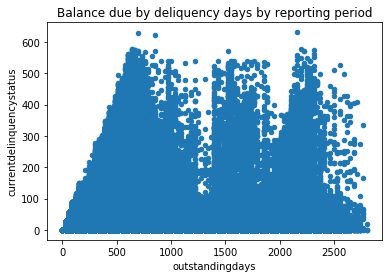

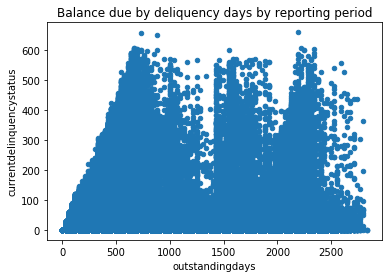

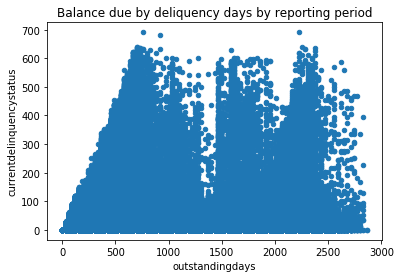

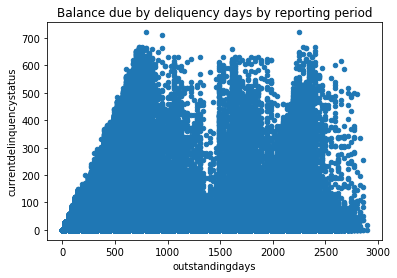

In [22]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='outstandingdays',y='currentdelinquencystatus', title='Balance due by deliquency days by reporting period')

### Dropping Loans Below Zero Outstanding Days

In [23]:
# retaining only loans with non-negative outstanding days
u=pd.value_counts(df.outstandingdays<0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.outstandingdays>0]

No Loans Below zero outstanding days


In [24]:
# get statistics for outstanding days
df.outstandingdays.describe()

count    3.832599e+07
mean     6.248898e+02
std      4.911189e+02
min      0.000000e+00
25%      2.760000e+02
50%      4.870000e+02
75%      7.910000e+02
max      2.891000e+03
Name: outstandingdays, dtype: float64

### Mean outstanding days for the reporting period

In [25]:
df.groupby(df.reportingperiodendingdate).outstandingdays.mean()

reportingperiodendingdate
2017-12-31    596.708186
2018-01-31    597.162629
2018-02-28    613.825718
2018-03-31    620.705891
2018-04-30    622.592863
2018-05-31    632.435459
2018-06-30    620.073131
2018-07-31    636.851078
2018-08-31    642.952035
2018-09-30    642.555641
Name: outstandingdays, dtype: float64

### Calculate Number of Days Left until Maturity

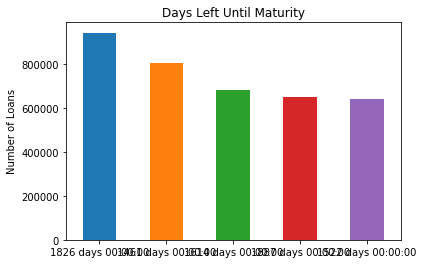

Top  5  counts:  
 1826 days    944269
1461 days    805400
1614 days    683669
1887 days    649146
1522 days    641382
Name: daystomaturity, dtype: int64


In [27]:
#calculate days left until maturity
df['daystomaturity'] = pd.to_datetime(df['loanmaturitydate'])-pd.to_datetime(df['reportingperiodendingdate'])
draw(df.daystomaturity, title='Days Left Until Maturity', ylabel='Number of Loans', sort=True, n=5)

### Create Feature Column for Days to Maturity

In [28]:
# remove 'days' string from the data for machine learning
df['daystomaturity']=df.daystomaturity.map(lambda x: np.nan if pd.isnull(x) else x.days)
# print last five rows
df.daystomaturity.tail()

40789588    2070
40789589    2070
40789590    2162
40789591    2070
40789592    1704
Name: daystomaturity, dtype: int64

In [29]:
#retaining only loans with non-negative days to maturity
u=pd.value_counts(df.daystomaturity<=0)
if len(u)<2:
    print('No Loans Below zero days to maturity')
else: 
    print('Number of Loans with negativedays to maturity :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative days to maturity)
    df=df[df.daystomaturity>0]
#number of rows and columns of the dataframe
df.shape

Number of Loans with negative outstanding days : 211628
Dropping  211628 rows and retaining loans with only non-negative outstanding days


(38114362, 59)

In [30]:
# statistics for days to maturity
df.daystomaturity.describe()

count    3.811436e+07
mean     1.414352e+03
std      5.393394e+02
min      2.800000e+01
25%      1.126000e+03
50%      1.522000e+03
75%      1.826000e+03
max      7.944000e+03
Name: daystomaturity, dtype: float64

### Mean days to maturity for the reporting period

In [31]:
df.groupby(df.reportingperiodendingdate).daystomaturity.mean()

reportingperiodendingdate
2017-12-31    1434.250065
2018-01-31    1432.597700
2018-02-28    1416.168161
2018-03-31    1413.388064
2018-04-30    1413.589661
2018-05-31    1404.781784
2018-06-30    1422.990132
2018-07-31    1407.193564
2018-08-31    1404.534268
2018-09-30    1406.304544
Name: daystomaturity, dtype: float64

### Outstandingdays Vs Days to maturity

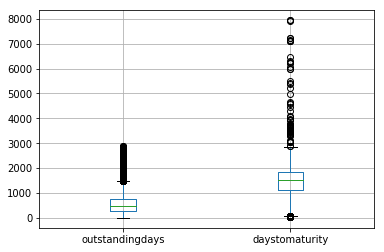

In [32]:
df[['outstandingdays', 'daystomaturity']].boxplot()

In [33]:
df.drop(['loanmaturitydate'], axis=1, inplace=True)

### Origination Date - Removing loans before origination cutoff date

In [34]:
# remove loans with orgination dates set for cut off earlier
u=pd.value_counts(df.originationdate<=cutOffForOriginationDate)
if len(u)<2:
    print('No origination date rows fall before ',cutOffForOriginationDate )
else: 
    print('Number of rows before',cutOffForOriginationDate ,':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with origination dates after', cutOffForOriginationDate)
    df=df[df.originationdate>cutOffForOriginationDate]
#new number of rows and columns of the dataframe
df.shape

Number of rows before 2012-01-01 : 21318
Dropping  21318 rows and retaining loans with origination dates after 2012-01-01


(38093044, 58)

### Top ten mean current deliquency status by origination date and reporting period

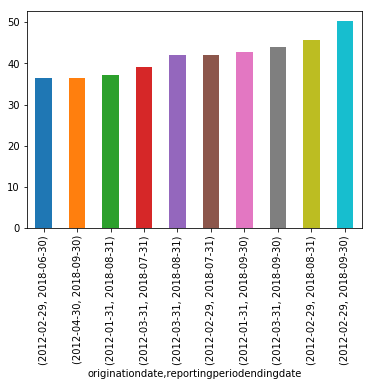

In [37]:
df.groupby([df.originationdate, df.reportingperiodendingdate]).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

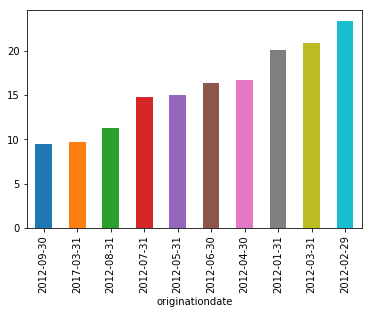

In [38]:
df.groupby(df.originationdate).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

### Originators Name

In [39]:
df.originatorname.unique()

array(['BMW Bank of North America', 'BMW Financial Services NA LLC', 'SC',
       'TMCC', 'Mechanics Bank',
       'USAAFSB                                           ', 'AHFC',
       'NMAC', 'Fifth Third Bank', 'VW Credit',
       'MBFS USA LLC                                      ',
       'Ford Credit', 'WORLD OMNI FINANCIAL CORP', 'HCA', 'CBS',
       'GM FINANCIAL', 'Ally Bank'], dtype=object)

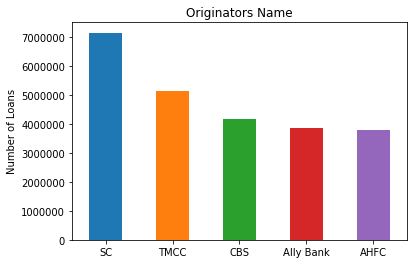

Top  -1  counts:  
 SC                                                    7160720
TMCC                                                  5146840
CBS                                                   4189044
Ally Bank                                             3868821
AHFC                                                  3801613
GM FINANCIAL                                          3762935
NMAC                                                  2679700
Ford Credit                                           1980320
WORLD OMNI FINANCIAL CORP                             1784451
HCA                                                   1620711
Fifth Third Bank                                       517389
BMW Bank of North America                              476824
VW Credit                                              334817
Mechanics Bank                                         290719
USAAFSB                                                280081
MBFS USA LLC                                      

In [40]:
# draw charts for originators name
draw(df.originatorname, title='Originators Name', ylabel='Number of Loans', sort=True)

### Create Features for Originators

In [41]:
df['originatorname']=df.originatorname.astype('category')

In [42]:
df.originatorname.isnull().sum()

0

In [45]:
df.groupby(df.originatorname).currentdelinquencystatus.mean().sort_values(ascending=False)

originatorname
SC                                                    15.784116
GM FINANCIAL                                           5.375721
CBS                                                    4.089413
HCA                                                    2.426914
Mechanics Bank                                         2.141769
BMW Financial Services NA LLC                          1.319035
Ally Bank                                              1.137996
Ford Credit                                            1.079708
WORLD OMNI FINANCIAL CORP                              0.947916
Fifth Third Bank                                       0.873758
TMCC                                                   0.836680
VW Credit                                              0.480618
AHFC                                                   0.475251
BMW Bank of North America                              0.457599
MBFS USA LLC                                           0.330023
NMAC                     

In [46]:
# create feature columns for categories within originator name 
def map_originatorname(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.originatorname).index.tolist()

for code in codes:
        df['originator_{}'.format(code)] = list(map(map_originatorname, df.originatorname))
        print('Added Column for :   originator_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   originator_SC
Added Column for :   originator_TMCC
Added Column for :   originator_CBS
Added Column for :   originator_Ally Bank
Added Column for :   originator_AHFC
Added Column for :   originator_GM FINANCIAL
Added Column for :   originator_NMAC
Added Column for :   originator_Ford Credit
Added Column for :   originator_WORLD OMNI FINANCIAL CORP
Added Column for :   originator_HCA
Added Column for :   originator_Fifth Third Bank
Added Column for :   originator_BMW Bank of North America
Added Column for :   originator_VW Credit
Added Column for :   originator_Mechanics Bank
Added Column for :   originator_USAAFSB                                           
Added Column for :   originator_MBFS USA LLC                                      
Added Column for :   originator_BMW Financial Services NA LLC
New Dataframe shape :  (38093044, 75)


In [47]:
# drop originator name column
df.drop(['originatorname'],axis=1, inplace=True)
# new number of rows and columns
df.shape

(38093044, 74)

### Original Loan Amount

In [48]:
df.groupby(df.reportingperiodendingdate).originalloanamount.mean()

reportingperiodendingdate
2017-12-31    23272.801950
2018-01-31    23659.893553
2018-02-28    23910.336048
2018-03-31    23757.446309
2018-04-30    23766.240942
2018-05-31    23977.618931
2018-06-30    24127.345765
2018-07-31    24078.270647
2018-08-31    24238.526245
2018-09-30    24292.118594
Name: originalloanamount, dtype: float64

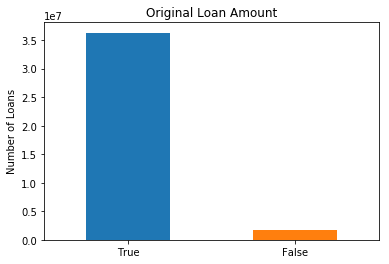

Top  -1  counts:  
 True    36289515
Name: originalloanamount, dtype: int64


In [49]:
# draw chart for original loan amount as filered in the next variable(original_loan_in_excess) 
original_loan_in_excess = 10000
draw(df.originalloanamount>original_loan_in_excess, title='Original Loan Amount', ylabel='Number of Loans', sort=True)

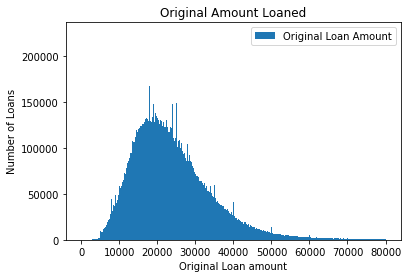

In [50]:
#draw a chart to view distribution of original loan amount
bins = np.linspace(0, 80000, 1000)
plt.hist(df.originalloanamount, bins, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Original Amount Loaned")
plt.xlabel('Original Loan amount')
plt.ylabel('Number of Loans')
plt.show()

In [51]:
# get statistics for original loan amount
df.originalloanamount.describe()

count    3.809304e+07
mean     2.395026e+04
std      1.089736e+04
min      5.510000e+02
25%      1.637528e+04
50%      2.209571e+04
75%      2.934400e+04
max      2.432811e+05
Name: originalloanamount, dtype: float64

### Remove Original Loan Amount Below Zero

In [52]:
# To remove rows with zero, non-negative or blank values for original loan amount

u=pd.value_counts(df.originalloanamount<=0)
if len(u)<2:
    print('No original loan amount blank or below zero')
else: 
    print('Number of original loan amount rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan amount more than zero')
    df=df[df.originalloanamount>0]
df.shape

No original loan amount blank or below zero


(38093044, 74)

### Original Loan Term

In [55]:
#check for NaN
df.originalloanterm.isna().mean()

0.0

In [53]:
df.groupby(df.reportingperiodendingdate).originalloanterm.mean()

reportingperiodendingdate
2017-12-31    66.917755
2018-01-31    66.817818
2018-02-28    66.863337
2018-03-31    66.989490
2018-04-30    67.000035
2018-05-31    67.002845
2018-06-30    67.211766
2018-07-31    67.166008
2018-08-31    67.264392
2018-09-30    67.300382
Name: originalloanterm, dtype: float64

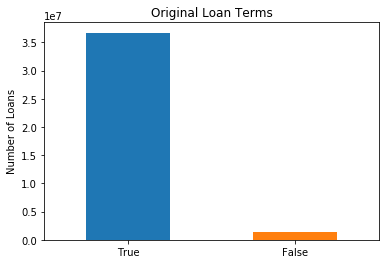

Top  -1  counts:  
 True    36726549
Name: originalloanterm, dtype: int64


In [56]:
# draw chart for original loan term based on the input of variable below(original_loan_term_excess)
original_loan_term_excess = 48
draw(df.originalloanterm>original_loan_term_excess, title='Original Loan Terms', ylabel='Number of Loans',sort=True)

In [67]:
### Top ten delinquency days by the original loan term

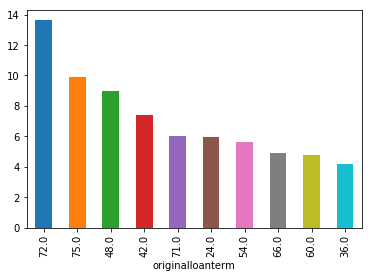

In [68]:
#df.plot(kind='scatter', x='originalloanterm', y='currentdelinquencystatus')
df.groupby(df.originalloanterm).currentdelinquencystatus.mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
#df.originalloanterm.plot(kind='hist', bins=10, title='Original Loan Term')

In [69]:
#statistics for original loan term
df.originalloanterm.describe()

count    3.809304e+07
mean     6.707793e+01
std      8.477195e+00
min      1.000000e+01
25%      6.100000e+01
50%      7.200000e+01
75%      7.300000e+01
max      8.600000e+01
Name: originalloanterm, dtype: float64

In [70]:
# remove rows with zero, blank or negative original loan term

u=pd.value_counts(df.originalloanterm<=0)
if len(u)<2:
    print('No original loan term blank or below zero')
else: 
    print('Number of original loan term rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan term more than zero')
    df=df[df.originalloanterm>0]
# new number of rows and columns of the dataframe
df.shape

No original loan term blank or below zero


(38093044, 74)

### Original loan term effect on current delinquency status days by the reporting period

reportingperiodendingdate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

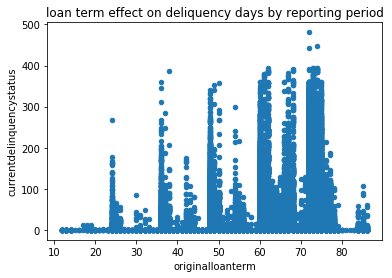

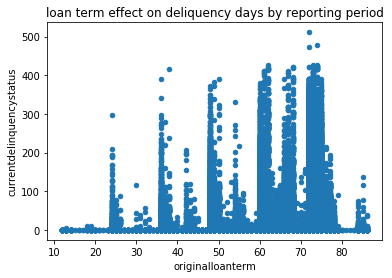

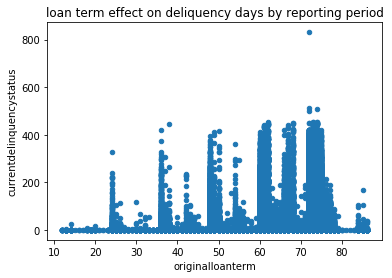

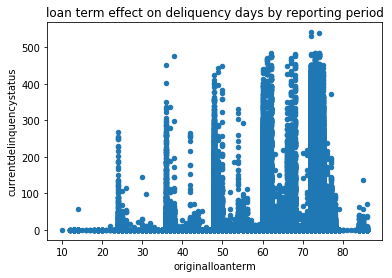

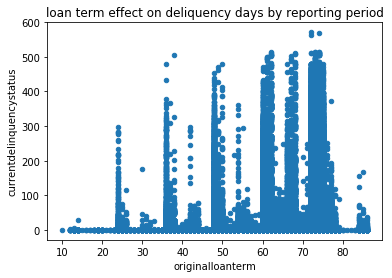

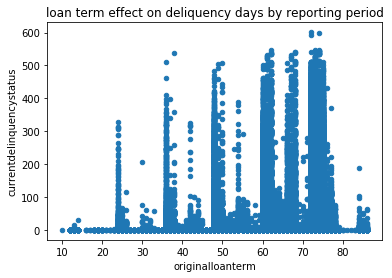

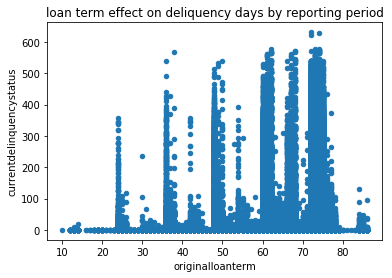

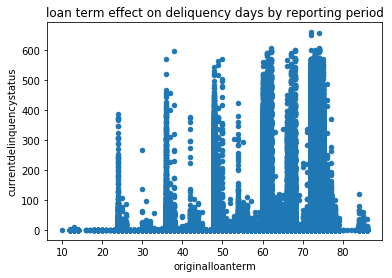

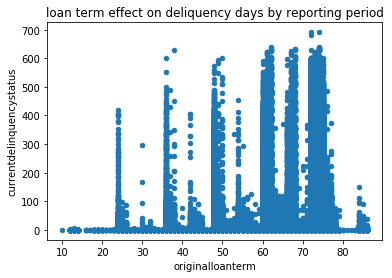

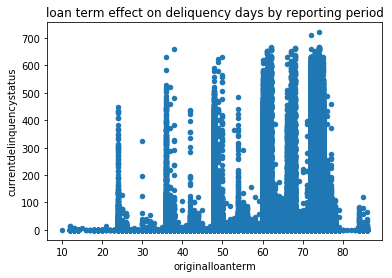

In [71]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='originalloanterm',y='currentdelinquencystatus', title='loan term effect on deliquency days by reporting period')

### Original interest rate percentage

In [72]:
df.originalinterestratepercentage.isna().mean()

0.0

In [73]:
# get statistics for originalinterestratepercentage
df.originalinterestratepercentage.describe()

count    3.809304e+07
mean     1.021080e-01
std      3.225119e-01
min      0.000000e+00
25%      1.900000e-02
50%      4.850000e-02
75%      1.170000e-01
max      1.514000e+01
Name: originalinterestratepercentage, dtype: float64

### Remove interest rates below zero

In [74]:
# drop rows with blank or negative original interest rate percentage and research on zero interest rate loans
u=pd.value_counts(df.originalinterestratepercentage<0)
if len(u)<2:
    print('No original interest rate blank or below zero')
else: 
    print('Number of original interest rate rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    df=df[df.originalinterestratepercentage>=0]
df.shape

No original interest rate blank or below zero


(38093044, 74)

### Retain zero interest loans?

In [75]:
# view zero original interest rate percentage loans
u=pd.value_counts(df.originalinterestratepercentage==0)
if len(u)<2:
    print('No zero original interest rate percentage')
else: 
    print('Number of zero original interest rate rows',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    #df=df[df.originalinterestratepercentage>=0]
df.shape

Number of zero original interest rate rows : 4782100


(38093044, 74)

### Interest rate percent effect on deliquency days by reporting period

reportingperiodendingdate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

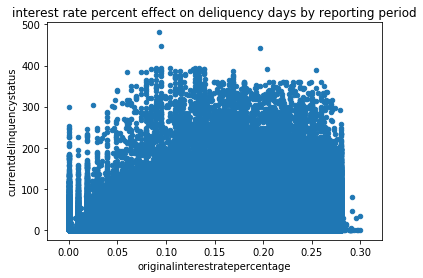

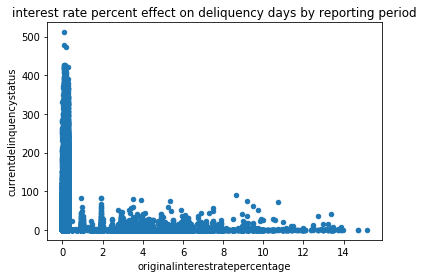

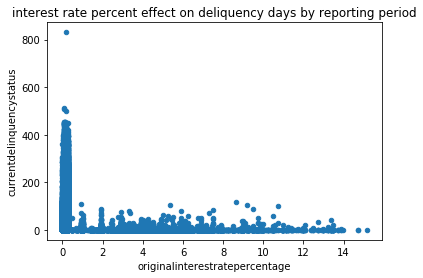

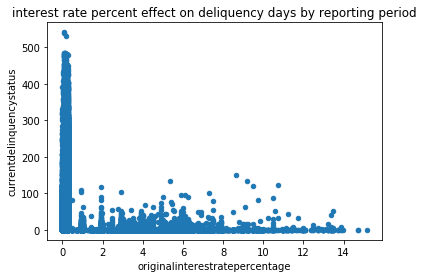

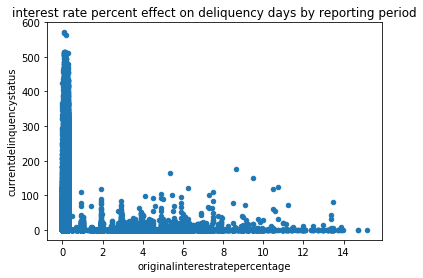

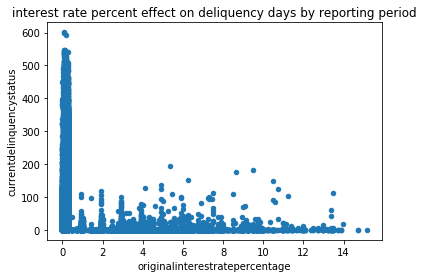

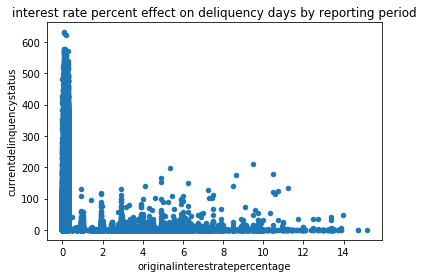

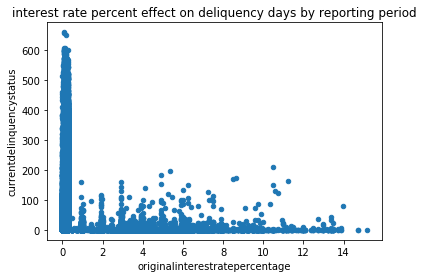

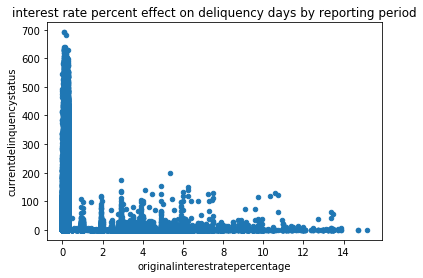

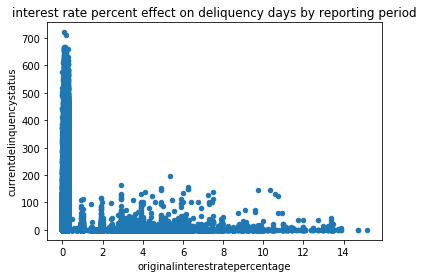

In [76]:
df.groupby(df.reportingperiodendingdate).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus', title='interest rate percent effect on deliquency days by reporting period')

### Underwriting Indicator

Indicate whether the loan met the criteria for the first level of solicitation, credit-granting or underwriting criteria used to originate the loan.

In [77]:
df.underwritingindicator.unique()

array([True, False], dtype=object)

In [78]:
# missing values
df.underwritingindicator.isna().mean()

0.0

In [79]:
df['underwritingindicator']=df.underwritingindicator.astype('category')

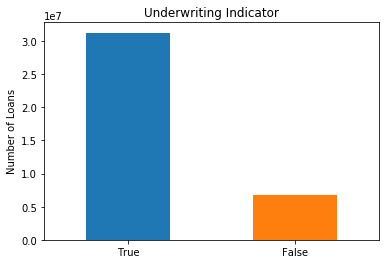

Top  -1  counts:  
 True    31277503
Name: underwritingindicator, dtype: int64


In [80]:
draw(df.underwritingindicator, title='Underwriting Indicator', ylabel='Number of Loans', sort=True)

underwritingindicator
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

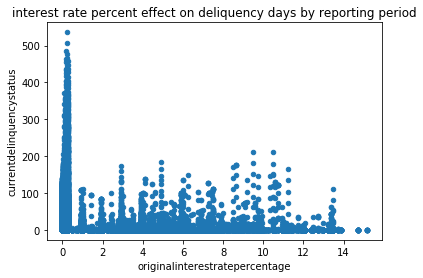

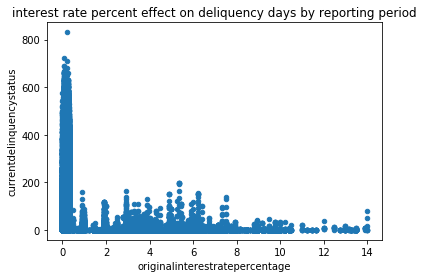

In [81]:
df.groupby(df.underwritingindicator).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus', title='interest rate percent effect on deliquency days by reporting period')

### Create Feature Column Underwriting

In [82]:
def map_underwriting_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == True:
            return 1
        elif column == False:
            return 0
        
df['underwriting_true'] = list(map(map_underwriting_true, df.underwritingindicator))
df.drop(['underwritingindicator'], axis=1, inplace=True)
pd.value_counts(df.underwriting_true)

1    31277503
0     6815541
Name: underwriting_true, dtype: int64

### Underwriting TRUE current deliquency status

In [83]:
#df.loc[df.underwriting_true==1].currentdelinquencystatus.plot(kind='hist', bins=10)
print('Total :',df.loc[df.underwriting_true==1].currentdelinquencystatus.value_counts().sum())
df.loc[df.underwriting_true==1].currentdelinquencystatus.value_counts().head()

Total : 31277503


0.0    26910933
3.0      210856
2.0      201197
5.0      195407
4.0      167853
Name: currentdelinquencystatus, dtype: int64

### Underwriting FALSE current deliquency status

In [84]:
#df.loc[df.underwriting_true==0].currentdelinquencystatus.plot(kind='hist', bins=10)
print('Total :',df.loc[df.underwriting_true==0].currentdelinquencystatus.value_counts().sum())
df.loc[df.underwriting_true==0].currentdelinquencystatus.value_counts().head()

Total : 6815541


0.0    6388807
1.0      31545
4.0      26448
3.0      23511
5.0      22496
Name: currentdelinquencystatus, dtype: int64

### Subvented

Indicate yes or no as to whether a form of subsidy is received on the loan, such as cash incentives or favorable financing for the buyer. 0: No, 1: Yes - Rate Subvention, 2: Yes - Cash Rebate, 98: Yes - Other

In [85]:
df.subvented.unique()

array(['["2"]', '["1"]', '["98"]', '["0"]', '["1","2"]', '["1","98"]',
       '["1"," 2"]', '["1"," 98"]', '["2","1"]'], dtype=object)

In [86]:
df['subvented']=df.subvented.astype('category')

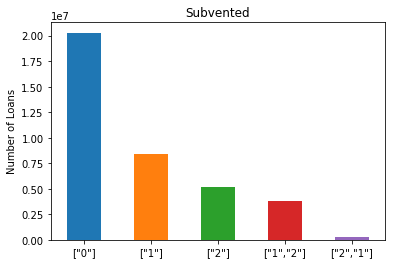

Top  -1  counts:  
 ["0"]         20288219
["1"]          8426519
["2"]          5197322
["1","2"]      3764866
["2","1"]       319652
["98"]           93193
["1"," 2"]        2859
["1","98"]         281
Name: subvented, dtype: int64


In [87]:
draw(df.subvented, title='Subvented', ylabel='Number of Loans', sort=True)

In [88]:
df.subvented.describe(include='all')

count     38093044
unique           9
top          ["0"]
freq      20288219
Name: subvented, dtype: object

### subvented effect on original interest rate percent and current deliquency days by reporting period

subvented
["0"]          AxesSubplot(0.125,0.125;0.775x0.755)
["1"," 2"]     AxesSubplot(0.125,0.125;0.775x0.755)
["1"," 98"]    AxesSubplot(0.125,0.125;0.775x0.755)
["1","2"]      AxesSubplot(0.125,0.125;0.775x0.755)
["1","98"]     AxesSubplot(0.125,0.125;0.775x0.755)
["1"]          AxesSubplot(0.125,0.125;0.775x0.755)
["2","1"]      AxesSubplot(0.125,0.125;0.775x0.755)
["2"]          AxesSubplot(0.125,0.125;0.775x0.755)
["98"]         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

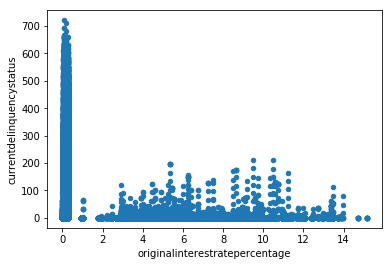

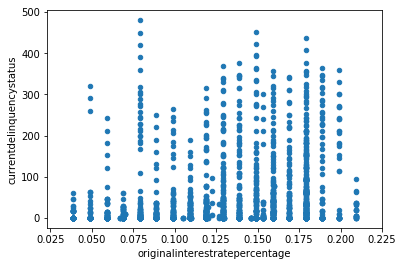

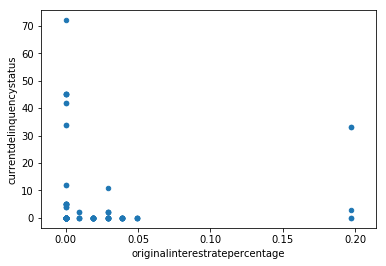

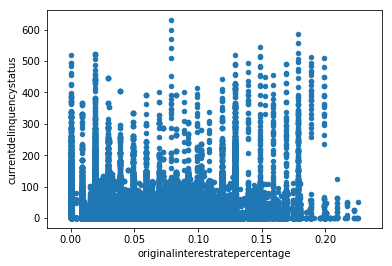

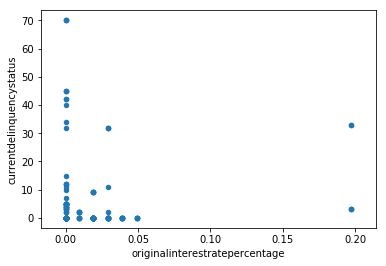

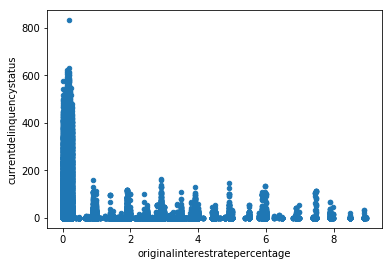

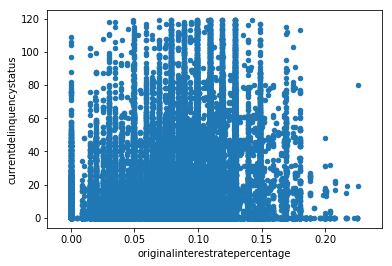

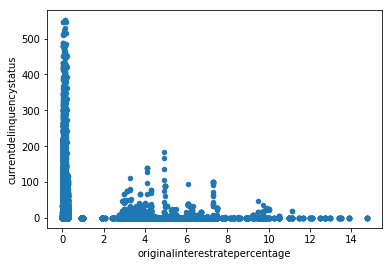

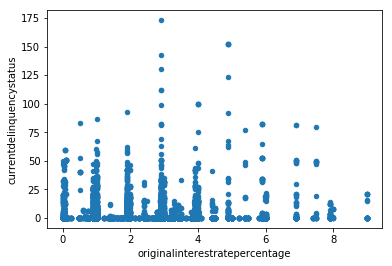

In [89]:
#label=df.groupby([df.reportingperiodendingdate, df.subvented])
#pd.value_counts(df.reportingperiodendingdate).keys().tolist()
#pd.value_counts(df.subvented).keys().tolist()
# sorted_obj=['["0"]','["1"]','["2"]''["98"]']
# label=[]
# for i in pd.value_counts(df.reportingperiodendingdate).sort_values(ascending=True).keys().tolist():
#     for j in pd.value_counts(df.subvented).sort_values(sorted_obj).keys().tolist():
#         label.append(str(i)+str(j))
# print(label)
#pd.value_counts(df.groupby([df.reportingperiodendingdate, df.subvented])).keys().tolist()


#df.loc[df.underwriting_true==0].currentdelinquencystatus.plot(kind='hist', bins=10)
df.groupby([df.subvented]).plot(kind='scatter', x='originalinterestratepercentage',y='currentdelinquencystatus')

### Create Feature Column for Subvented

In [90]:
# create feature columns for subvented
def map_subvented(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.subvented).index.tolist()

for code in codes:
        df['subvented_{}'.format(code)] = list(map(map_subvented, df.subvented))
        print('Added Column for :   subvented_'+code)
print('New Dataframe shape : ', df.shape)
df.drop(['subvented'], axis=1, inplace=True)

Added Column for :   subvented_["0"]
Added Column for :   subvented_["1"]
Added Column for :   subvented_["2"]
Added Column for :   subvented_["1","2"]
Added Column for :   subvented_["2","1"]
Added Column for :   subvented_["98"]
Added Column for :   subvented_["1"," 2"]
Added Column for :   subvented_["1","98"]
Added Column for :   subvented_["1"," 98"]
New Dataframe shape :  (38093044, 83)


### Vehicle New or Used code

Indicate whether the vehicle financed is new or used at the time of origination. 1: New, 2: Used

In [91]:
df.vehiclenewusedcode.unique()

array([1., 2.])

In [92]:
df['vehiclenewusedcode']=df.vehiclenewusedcode.astype('category')

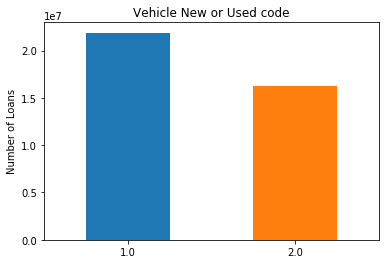

Top  -1  counts:  
 1.0    21884248
Name: vehiclenewusedcode, dtype: int64


In [93]:
draw(df.vehiclenewusedcode, title='Vehicle New or Used code', ylabel='Number of Loans', sort=True)

### Create Feature Column for New or Used

In [94]:
def map_vehiclenewusedcode_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['vehiclenew_true'] = list(map(map_vehiclenewusedcode_true, df.vehiclenewusedcode))
print('Added Column for :   vehiclenew_true')
df.drop(['vehiclenewusedcode'], axis=1, inplace=True)
pd.value_counts(df.vehiclenew_true)

Added Column for :   vehiclenew_true


1    21884248
0    16208796
Name: vehiclenew_true, dtype: int64

### New Vehicles mean deliquency days by the reporting period

In [95]:
df.groupby([df.reportingperiodendingdate,df.vehiclenew_true]).currentdelinquencystatus.mean()

reportingperiodendingdate  vehiclenew_true
2017-12-31                 0                  5.267684
                           1                  2.308546
2018-01-31                 0                  5.787061
                           1                  2.353131
2018-02-28                 0                  5.928844
                           1                  2.233644
2018-03-31                 0                  5.492766
                           1                  2.160762
2018-04-30                 0                  6.189250
                           1                  2.352849
2018-05-31                 0                  6.742433
                           1                  2.524948
2018-06-30                 0                  6.748233
                           1                  2.629378
2018-07-31                 0                  7.834108
                           1                  3.055302
2018-08-31                 0                  8.489609
                      

### Vehicle Type code ---relevancy for machine learning ?

Indicate the code describing the vehicle type. 1: Car, 2:
Truck, 3: SUV, 4: Motorcycle, 98: Other, 99: Unknown

In [96]:
df.vehicletypecode.unique()

array([ 1.,  3.,  4.,  2., 98., 99.])

In [ ]:
#df['vehicletypecode']=df.vehicletypecode.astype('category')

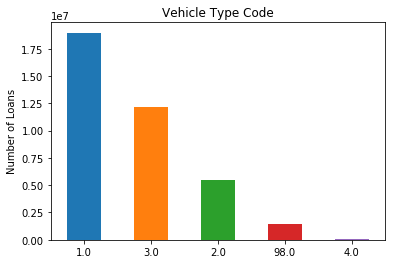

Top  -1  counts:  
 1.0     18962236
3.0     12142461
2.0      5492262
98.0     1456561
4.0        35080
Name: vehicletypecode, dtype: int64


In [97]:
draw(df.vehicletypecode, title='Vehicle Type Code', ylabel='Number of Loans', sort=True)

In [98]:
df.vehicletypecode.describe()

count    3.809304e+07
mean     5.504874e+00
std      1.849393e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      9.900000e+01
Name: vehicletypecode, dtype: float64

In [99]:
df.drop(['vehicletypecode'],axis=1, inplace=True)
df.shape

(38093044, 81)

### Obligor Credit Score Type

Specify the type of the standardized credit score used to
evaluate the obligor during the loan origination process

In [100]:
df.obligorcreditscoretype.unique()

array(['FICO', 'Bureau', 'FICO Score 2 Auto', 'FICO Score 8 Auto',
       'Credit Bureau', 'Consumer Bureau', 'Commercial Bureau',
       'CREDIT BUREAU', 'Consumer Credit Bureau', 'Unknown/Invalid',
       'Credit Bureau Score', 'None'], dtype=object)

In [101]:
df['obligorcreditscoretype']=df.obligorcreditscoretype.astype('category')

In [102]:
df.obligorcreditscoretype.isna().mean()

0.0

In [103]:
df.obligorcreditscoretype.unique()

[FICO, Bureau, FICO Score 2 Auto, FICO Score 8 Auto, Credit Bureau, ..., CREDIT BUREAU, Consumer Credit Bureau, Unknown/Invalid, Credit Bureau Score, None]
Length: 12
Categories (12, object): [FICO, Bureau, FICO Score 2 Auto, FICO Score 8 Auto, ..., Consumer Credit Bureau, Unknown/Invalid, Credit Bureau Score, None]

In [116]:
df.obligorcreditscore.str.contains('Unknown/Invalid').sum()

# #remove = ['Unknown/Invalid', 'None' ]

# u=pd.value_counts(df.obligorcreditscoretype==str('Unknown/Invalid') & ('None'))
# if len(u)<2:
#     print('No blank or zero obligor income verification level code')
# else: 
#     print('Number of loans with no obligor income verification level code',':', u[1])
#     print('Dropping ', u[1], 'rows and retaining loans with obligor income verification level code')
#     #df=df[df.obligorincomeverificationlevelcode>0]
# df.shape

0

In [118]:
pd.value_counts(df.obligorcreditscoretype=='None')

False    38043410
True        49634
Name: obligorcreditscoretype, dtype: int64

In [122]:
df=df[~df.obligorcreditscore.astype(str).str.contains('None')]

In [123]:
pd.value_counts(df.obligorcreditscoretype=='None')

False    38043410
Name: obligorcreditscoretype, dtype: int64

In [137]:
df['obligorcreditscoretype']=df.obligorcreditscoretype.astype('str')

In [138]:
pd.value_counts(df.obligorcreditscoretype=='Unknown/Invalid')

False    38033694
True         9716
Name: obligorcreditscoretype, dtype: int64

In [143]:
df=df[~df.obligorcreditscore.astype(str).str.contains('Unknown/Invalid')]

In [144]:
pd.value_counts(df.obligorcreditscoretype=='Unknown/Invalid')

False    38033694
True         9716
Name: obligorcreditscoretype, dtype: int64

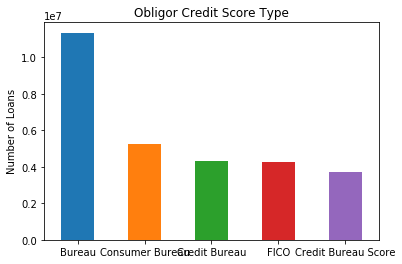

Top  -1  counts:  
 Bureau                    11349764
Consumer Bureau            5257579
Credit Bureau              4334116
FICO                       4245086
Credit Bureau Score        3737760
FICO Score 8 Auto          2732613
FICO Score 2 Auto          2414227
CREDIT BUREAU              1784451
Consumer Credit Bureau     1610995
Commercial Bureau           567103
Name: obligorcreditscoretype, dtype: int64


In [145]:
draw(df.obligorcreditscoretype, title='Obligor Credit Score Type', ylabel='Number of Loans', sort=True)

In [146]:
df.obligorcreditscoretype.describe()

count     38043410
unique          11
top         Bureau
freq      11349764
Name: obligorcreditscoretype, dtype: object

In [147]:
df.groupby([df.reportingperiodendingdate,df.obligorcreditscoretype]).currentdelinquencystatus.mean()

reportingperiodendingdate  obligorcreditscoretype
2017-12-31                 Bureau                     8.042653
                           CREDIT BUREAU              1.246871
                           Commercial Bureau          0.654474
                           Consumer Bureau            1.307557
                           Consumer Credit Bureau     1.825452
                           Credit Bureau              0.520655
                           Credit Bureau Score        6.622250
                           FICO                       0.585494
                           FICO Score 2 Auto          1.084435
                           FICO Score 8 Auto          0.877429
                           Unknown/Invalid            9.940644
2018-01-31                 Bureau                     8.798952
                           CREDIT BUREAU              1.199583
                           Commercial Bureau          0.740420
                           Consumer Bureau            1.206956
     

### Create features for obligator credit score type

In [148]:
def map_obligorcreditscoretype(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorcreditscoretype).index.tolist()

for code in codes:
        df['credit_type_{}'.format(code)] = list(map(map_obligorcreditscoretype, df.obligorcreditscoretype))
        print('Added Column for :   credit_type_'+code)
#df.drop(['obligorcreditscoretype'], axis=1, inplace=True)
df.shape       

Added Column for :   credit_type_Bureau
Added Column for :   credit_type_Consumer Bureau
Added Column for :   credit_type_Credit Bureau
Added Column for :   credit_type_FICO
Added Column for :   credit_type_Credit Bureau Score
Added Column for :   credit_type_FICO Score 8 Auto
Added Column for :   credit_type_FICO Score 2 Auto
Added Column for :   credit_type_CREDIT BUREAU
Added Column for :   credit_type_Consumer Credit Bureau
Added Column for :   credit_type_Commercial Bureau
Added Column for :   credit_type_Unknown/Invalid


(38043410, 92)

### Obligor Credit Score

Provide the standardized credit score of the obligor used to
evaluate the obligor during the loan origination process

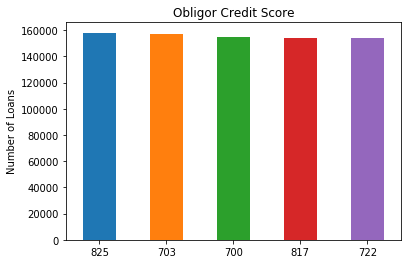

Top  10  counts:  
 825    158006
703    156950
700    154708
817    154109
722    154100
729    152416
827    147340
701    146326
810    145427
795    144585
Name: obligorcreditscore, dtype: int64


In [149]:
draw(df.obligorcreditscore, title='Obligor Credit Score', ylabel='Number of Loans', sort=True, n=10)

In [150]:
df.obligorcreditscore.describe()

count     37049351
unique        1404
top            825
freq        158006
Name: obligorcreditscore, dtype: object

### Remove and Drop rows of Obligor Credit Score with strings('no score', 'none', 'Nan')

In [151]:
#search for strings in the columns
q=df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False).sum()
print('Number of Strings in the Columns : ', q)
if q > 0:
    u=df[df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)].obligorcreditscore.unique()
    print('Strings in data : ', u)
    df=df[~df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)]
else:
    print('No strings in the Obligor Credit Score')

C:\PROGRA~1\Anaconda3_4\envs\tf_111\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


Number of Strings in the Columns :  1161360


C:\PROGRA~1\Anaconda3_4\envs\tf_111\lib\site-packages\ipykernel\__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Strings in data :  [nan 'No Score' 'NONE']


C:\PROGRA~1\Anaconda3_4\envs\tf_111\lib\site-packages\ipykernel\__main__.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [152]:
#Number of blanks in the column
df.obligorcreditscore.astype(str).str.contains(r'^(\s+)$').sum()

C:\PROGRA~1\Anaconda3_4\envs\tf_111\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


0

In [ ]:
#pd.crosstab(df.reportingperiodendingdate, df.obligorcreditscore)

In [ ]:

#df=df[~df.obligorcreditscore.str.contains(r'^([^0-9]*)$', na=False)]

In [ ]:
#df.isnull().sum()

In [ ]:
#df.obligorcreditscore.isnull().value_counts()

In [ ]:
#df[df.obligorcreditscore.isnull()]

In [153]:
df=df.dropna(subset=['obligorcreditscore'])

In [154]:
df.obligorcreditscore.value_counts(dropna=False).sort_values(ascending=False).head()

825    158006
703    156950
700    154708
817    154109
722    154100
Name: obligorcreditscore, dtype: int64

In [155]:
df.obligorcreditscore.isnull().values.any()

False

In [156]:
df['obligorcreditscore']=df.obligorcreditscore.astype('float')

In [157]:
df.groupby([df.reportingperiodendingdate, df.obligorcreditscoretype]).obligorcreditscore.mean()

reportingperiodendingdate  obligorcreditscoretype
2017-12-31                 Bureau                    640.798508
                           CREDIT BUREAU             730.470229
                           Commercial Bureau         345.757318
                           Consumer Bureau           738.039224
                           Consumer Credit Bureau    749.013675
                           Credit Bureau             764.425862
                           Credit Bureau Score       608.102080
                           FICO                      764.365231
                           FICO Score 2 Auto         758.161140
                           FICO Score 8 Auto         764.810858
                           Unknown/Invalid             0.000000
2018-01-31                 Bureau                    635.562201
                           CREDIT BUREAU             730.501119
                           Commercial Bureau         282.315444
                           Consumer Bureau           7

In [158]:
df.drop(['obligorcreditscoretype'], axis=1, inplace=True)

### Obligor Income Verification Level Code

Indicate the code describing the extent to which the
obligor's income was verified during the loan origination
process. 1: Not stated, not verified, 2: Stated, not verified,
3: Stated, verified but not to level 4 or level 5., 4: Stated,
"level 4" verifiedLevel 4 income verification = Previous year
W-2 or tax returns, and year-to-date pay stubs, if salaried. If
self-employed, then obligor provided 2 years of tax returns.,
5: Stated, "level 5" verifiedLevel 5 income verification = 24
months income verification (W-2s, pay stubs, bank
statements and/or tax returns). If self-employed, then
obligor provided 2 years tax returns plus a CPA certification
of the tax returns.

In [159]:
df.obligorincomeverificationlevelcode.isna().mean()

0.006656815442742472

In [161]:
df['obligorincomeverificationlevelcode']=df.obligorincomeverificationlevelcode.astype('category')

In [162]:
df=df.dropna(subset=['obligorincomeverificationlevelcode'])

In [163]:
df.obligorincomeverificationlevelcode.isna().mean()

0.0

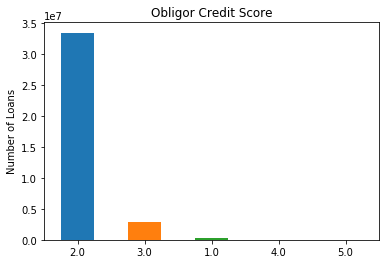

Top  -1  counts:  
 2.0    33389592
3.0     2931947
1.0      314491
4.0         438
Name: obligorincomeverificationlevelcode, dtype: int64


In [164]:
draw(df.obligorincomeverificationlevelcode, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [165]:
df.obligorincomeverificationlevelcode.describe()

count     36636533.0
unique           5.0
top              2.0
freq      33389592.0
Name: obligorincomeverificationlevelcode, dtype: float64

In [166]:
pd.value_counts(df.obligorincomeverificationlevelcode)

2.0    33389592
3.0     2931947
1.0      314491
4.0         438
5.0          65
Name: obligorincomeverificationlevelcode, dtype: int64

In [167]:
u=pd.value_counts(df.obligorincomeverificationlevelcode==0)
if len(u)<2:
    print('No blank or zero obligor income verification level code')
else: 
    print('Number of loans with no obligor income verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor income verification level code')
    df=df[df.obligorincomeverificationlevelcode>0]
df.shape

No blank or zero obligor income verification level code


(36636533, 91)

In [168]:
df.groupby([df.reportingperiodendingdate, df.obligorincomeverificationlevelcode]).obligorcreditscore.mean()

reportingperiodendingdate  obligorincomeverificationlevelcode
2017-12-31                 1.0                                   531.293271
                           2.0                                   720.314062
                           3.0                                   572.402278
                           4.0                                   613.052632
                           5.0                                   676.833333
2018-01-31                 1.0                                   531.297545
                           2.0                                   721.406553
                           3.0                                   571.182649
                           4.0                                   627.450000
                           5.0                                   676.833333
2018-02-28                 1.0                                   531.872686
                           2.0                                   722.856783
                          

In [169]:
df.groupby([df.reportingperiodendingdate, df.obligorincomeverificationlevelcode]).currentdelinquencystatus.mean()

reportingperiodendingdate  obligorincomeverificationlevelcode
2017-12-31                 1.0                                    0.446420
                           2.0                                    2.785428
                           3.0                                   10.086673
                           4.0                                    1.789474
                           5.0                                    0.000000
2018-01-31                 1.0                                    0.504806
                           2.0                                    2.879627
                           3.0                                   11.637833
                           4.0                                    1.675000
                           5.0                                    0.000000
2018-02-28                 1.0                                    0.444141
                           2.0                                    2.893167
                           3.0        

### Create Feature Columns for Obligor Income Verification Code

In [170]:
def map_obligorincomeverificationlevelcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorincomeverificationlevelcode).index.tolist()

for code in codes:
        df['income_code_{}'.format(code)] = list(map(map_obligorincomeverificationlevelcode, df.obligorincomeverificationlevelcode))
        print('Added Column for :   income_code_'+str(code))
df.drop(['obligorincomeverificationlevelcode'], axis=1, inplace=True)
df.shape

Added Column for :   income_code_2.0
Added Column for :   income_code_3.0
Added Column for :   income_code_1.0
Added Column for :   income_code_4.0
Added Column for :   income_code_5.0


(36636533, 95)

### Obligor Employment Verification Code

Indicate the code describing the extent to which the
obligor's employment was verified during the loan
origination process. 1: Not stated, not verified, 2: Stated,
not verified, 3: Stated, level 3 verified Level 3 verified =
Direct independent verification with a third party of the
obligors current employment.

In [171]:
df.obligoremploymentverificationcode.isna().mean()

0.0

In [172]:
df['obligoremploymentverificationcode']=df.obligoremploymentverificationcode.astype('category')

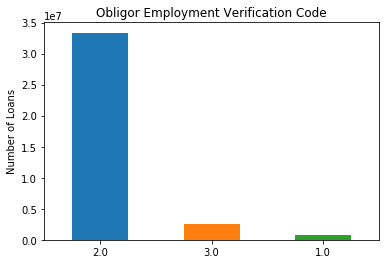

Top  -1  counts:  
 2.0    33354900
3.0     2557500
Name: obligoremploymentverificationcode, dtype: int64


In [173]:
draw(df.obligoremploymentverificationcode, title='Obligor Employment Verification Code', ylabel='Number of Loans', sort=True)

In [174]:
df.obligoremploymentverificationcode.describe()

count     36636533.0
unique           3.0
top              2.0
freq      33354900.0
Name: obligoremploymentverificationcode, dtype: float64

In [175]:
u=pd.value_counts(df.obligoremploymentverificationcode==0)
if len(u)<2:
    print('No blank or zero obligor employment verification level code')
else: 
    print('Number of loans with no obligor employment verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor employment verification level code')
    df=df[df.obligoremploymentverificationcode>0]
df.shape

No blank or zero obligor employment verification level code


(36636533, 95)

In [176]:
df.groupby([df.reportingperiodendingdate, df.obligoremploymentverificationcode]).obligorcreditscore.mean()

reportingperiodendingdate  obligoremploymentverificationcode
2017-12-31                 1.0                                  577.717453
                           2.0                                  719.924296
                           3.0                                  572.066208
2018-01-31                 1.0                                  577.833093
                           2.0                                  721.109041
                           3.0                                  571.188197
2018-02-28                 1.0                                  578.052858
                           2.0                                  722.576145
                           3.0                                  572.554133
2018-03-31                 1.0                                  580.389419
                           2.0                                  721.390632
                           3.0                                  573.904270
2018-04-30                 1.0         

In [177]:
df.groupby([df.reportingperiodendingdate, df.obligoremploymentverificationcode]).currentdelinquencystatus.mean()

reportingperiodendingdate  obligoremploymentverificationcode
2017-12-31                 1.0                                   6.119229
                           2.0                                   2.790726
                           3.0                                   9.889992
2018-01-31                 1.0                                   6.798773
                           2.0                                   2.890090
                           3.0                                  11.426082
2018-02-28                 1.0                                   7.693892
                           2.0                                   2.887280
                           3.0                                  10.585226
2018-03-31                 1.0                                   6.939192
                           2.0                                   2.791969
                           3.0                                   9.125760
2018-04-30                 1.0                     

### Create feature Columns for obligor employment verification

In [178]:
def map_obligoremploymentverificationcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligoremploymentverificationcode).index.tolist()

for code in codes:
        df['empl_code_{}'.format(code)] = list(map(map_obligoremploymentverificationcode, df.obligoremploymentverificationcode))
        print('Added Column for :   empl_code_'+str(code))
df.drop(['obligoremploymentverificationcode'], axis=1, inplace=True)
df.shape

Added Column for :   empl_code_2.0
Added Column for :   empl_code_3.0
Added Column for :   empl_code_1.0


(36636533, 97)

### Co-obligator Indicator

Indicate whether the loan has a co-obligor.

In [179]:
df.coobligorindicator.isna().mean()

0.0

In [180]:
df['coobligorindicator']=df.coobligorindicator.astype('category')

In [181]:
df.coobligorindicator.describe()

count     36636533
unique           2
top          False
freq      23868174
Name: coobligorindicator, dtype: object

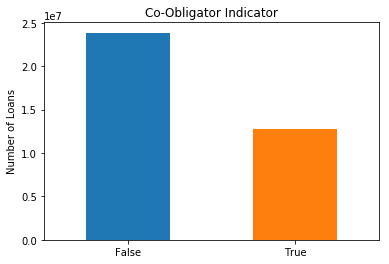

Top  -1  counts:  
 False    23868174
Name: coobligorindicator, dtype: int64


In [182]:
draw(df.coobligorindicator, title='Co-Obligator Indicator', ylabel='Number of Loans', sort=True)

In [183]:
df.groupby([df.reportingperiodendingdate, df.coobligorindicator]).obligorcreditscore.mean()

reportingperiodendingdate  coobligorindicator
2017-12-31                 False                 698.642708
                           True                  719.878496
2018-01-31                 False                 700.803192
                           True                  720.712021
2018-02-28                 False                 702.793540
                           True                  722.533123
2018-03-31                 False                 701.057050
                           True                  721.137935
2018-04-30                 False                 698.789214
                           True                  718.568166
2018-05-31                 False                 700.657374
                           True                  720.518757
2018-06-30                 False                 698.948646
                           True                  718.912844
2018-07-31                 False                 698.646844
                           True                  718.2

In [184]:
df.groupby([df.reportingperiodendingdate, df.coobligorindicator]).currentdelinquencystatus.mean()

reportingperiodendingdate  coobligorindicator
2017-12-31                 False                 3.554490
                           True                  3.083709
2018-01-31                 False                 3.743315
                           True                  3.260571
2018-02-28                 False                 3.710361
                           True                  3.120382
2018-03-31                 False                 3.543993
                           True                  2.931382
2018-04-30                 False                 3.941930
                           True                  3.264521
2018-05-31                 False                 4.242369
                           True                  3.519098
2018-06-30                 False                 4.339678
                           True                  3.596171
2018-07-31                 False                 5.031009
                           True                  4.164381
2018-08-31                

### Create features for Co-obligator Indicator

In [185]:
def map_coobligorindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['coobligorindicator_true'] = list(map(map_coobligorindicator_true, df.coobligorindicator))
df.drop(['coobligorindicator'], axis=1, inplace=True)
print('Added Column for :   coobligorindicator_true')
pd.value_counts(df.coobligorindicator_true)

Added Column for :   coobligorindicator_true


0    23868174
1    12768359
Name: coobligorindicator_true, dtype: int64

### Reporting Period Actual End Balance Amount

Mean reporting period actual end balance amount by the reporting period ending date

In [186]:
df.reportingperiodactualendbalanceamount.isna().mean()

0.0

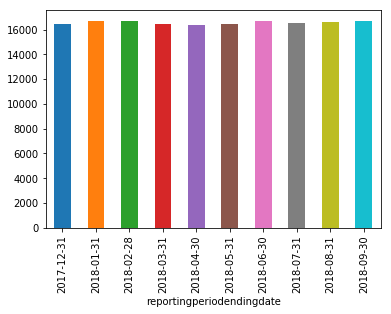

In [187]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean().plot(kind='bar')

In [188]:
df.reportingperiodactualendbalanceamount.describe()

count    3.663653e+07
mean     1.655926e+04
std      1.023207e+04
min     -9.978260e+03
25%      9.859200e+03
50%      1.543065e+04
75%      2.185874e+04
max      2.111091e+05
Name: reportingperiodactualendbalanceamount, dtype: float64

In [189]:
df.groupby([df.reportingperiodendingdate]).reportingperiodactualendbalanceamount.mean()

reportingperiodendingdate
2017-12-31    16438.754862
2018-01-31    16698.687520
2018-02-28    16701.214073
2018-03-31    16451.871789
2018-04-30    16390.253413
2018-05-31    16431.019717
2018-06-30    16709.541475
2018-07-31    16505.823190
2018-08-31    16568.272952
2018-09-30    16665.563965
Name: reportingperiodactualendbalanceamount, dtype: float64

reportingperiodendingdate
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

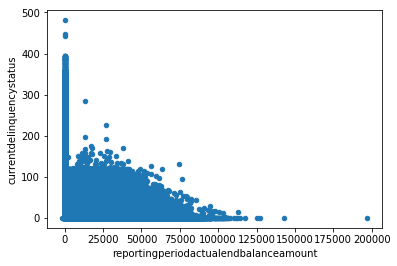

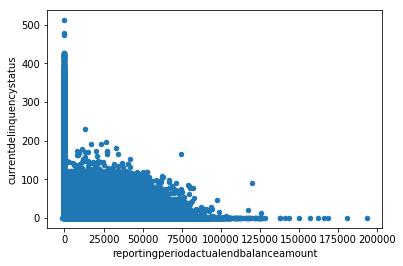

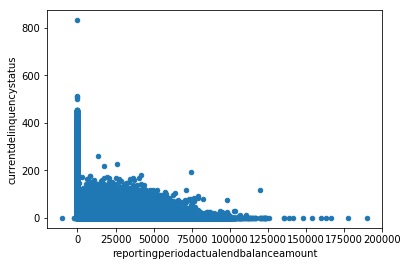

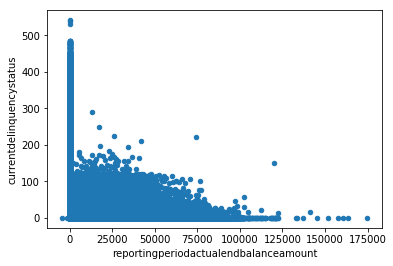

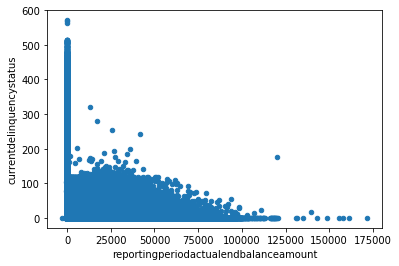

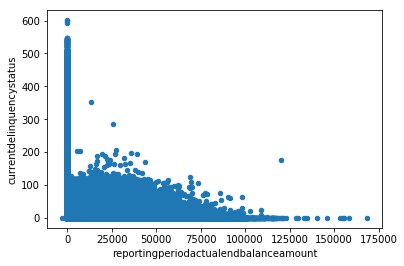

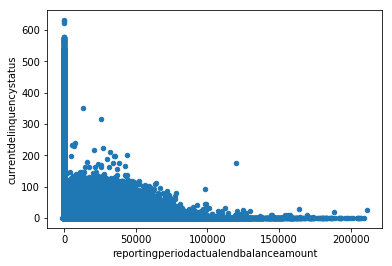

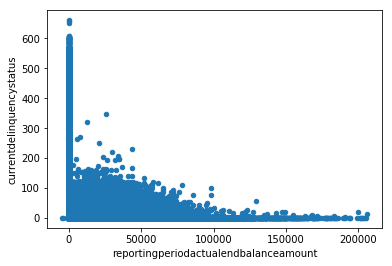

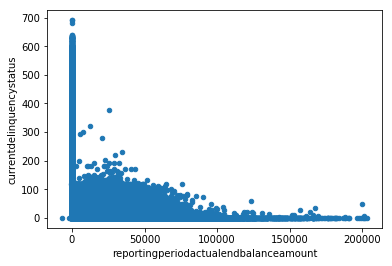

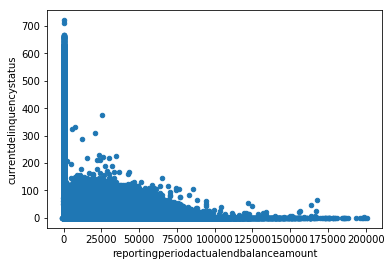

In [190]:
df.groupby([df.reportingperiodendingdate]).plot(kind='scatter', x='reportingperiodactualendbalanceamount',y='currentdelinquencystatus')

### Dropping loans with zero or negative reporting period actual end balance amount

In [191]:
u=pd.value_counts(df.reportingperiodactualendbalanceamount<=0)
if len(u)<2:
    print('No blank or zero or negative reporting period actual end balance amount')
else: 
    print('Number of loans with no reporting period actual end balance amount',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with reporting period actual end balance amount')
    df=df[df.reportingperiodactualendbalanceamount>0]
df.shape

Number of loans with no reporting period actual end balance amount : 1159910
Dropping  1159910 rows and retaining loans with reporting period actual end balance amount


(35476623, 97)

### Total Actual amount paid...keep or drop?

In [192]:
df.totalactualamountpaid.isna().mean()

0.0007536512142094247

In [193]:
df=df.dropna(subset=['totalactualamountpaid'])

In [194]:
df.totalactualamountpaid.describe()

count    3.544989e+07
mean     4.594995e+02
std      6.697376e+02
min     -6.295710e+04
25%      2.880000e+02
50%      4.000000e+02
75%      5.490000e+02
max      2.041267e+05
Name: totalactualamountpaid, dtype: float64

In [195]:
u=pd.value_counts(df.totalactualamountpaid<=0)
if len(u)<2:
    print('No blank or zero or negative total actual amount paid')
else: 
    print('Number of loans with no or negative total actual amount paid',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.totalactualamountpaid>0]
df.shape

Number of loans with no or negative total actual amount paid : 3508738


(35449886, 97)

### Actual interest collected amount...keep or drop

In [196]:
df.actualinterestcollectedamount.isna().mean()

0.0

In [197]:
df.actualinterestcollectedamount.describe()

count    3.544989e+07
mean     9.271355e+01
std      1.357428e+02
min     -9.635720e+03
25%      6.440000e+00
50%      4.161000e+01
75%      1.189900e+02
max      5.538290e+03
Name: actualinterestcollectedamount, dtype: float64

In [198]:
u=pd.value_counts(df.actualinterestcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual interest collected amount')
else: 
    print('Number of loans with no or negative actual interest collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual interest collected amount')
    #df=df[df.actualinterestcollectedamount>0]
df.shape

Number of loans with no or negative actual interest collected amount : 7912415


(35449886, 97)

### Actual principal collected amount...keep or drop

In [199]:
df.actualprincipalcollectedamount.isna().mean()

0.0

In [200]:
df.actualprincipalcollectedamount.describe()

count    3.544989e+07
mean     3.661626e+02
std      6.578312e+02
min     -6.320647e+04
25%      1.818900e+02
50%      3.115500e+02
75%      4.563700e+02
max      2.031540e+05
Name: actualprincipalcollectedamount, dtype: float64

In [201]:
u=pd.value_counts(df.actualprincipalcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual principal collected amount')
else: 
    print('Number of loans with zero or negative actual principal collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual principal collected amount')
    #df=df[df.actualprincipalcollectedamount>0]
df.shape

Number of loans with zero or negative actual principal collected amount : 4346038


(35449886, 97)

### Interest paid through date

In [202]:
df.interestpaidthroughdate.isna().mean()
#pd.value_counts(df.interestpaidthroughdate).head(n=10)

0.036413995802412454

In [203]:
df.interestpaidthroughdate.isna().sum()

1290872

In [204]:
df.interestpaidthroughdate.describe()

count       34159014
unique          2071
top       1900-01-01
freq         1919581
Name: interestpaidthroughdate, dtype: object

### Dropping interest paid through date '1900-01-01'

In [205]:
u=pd.value_counts(df.interestpaidthroughdate=='1900-01-01')
if len(u)<2:
    print('No blank or zero interest paid throughdate as 1900-01-01')
else: 
    print('Number of loans with zero or 1900-01-01 as  interest paid throughdate',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

Number of loans with zero or 1900-01-01 as  interest paid throughdate : 1919581


(35449886, 97)

### Dropping interest paid through data

In [206]:
df.drop(['interestpaidthroughdate'], axis=1, inplace=True)
df.shape

(35449886, 96)

### Number of Days from origination to first payment date

In [207]:
df.originalfirstpaymentdate.isna().mean()

0.0

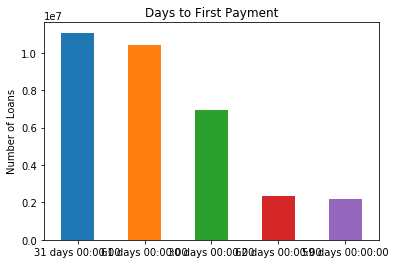

Top  5  counts:  
 31 days    11066177
61 days    10404530
30 days     6923974
62 days     2327949
59 days     2206337
Name: daystofirstpayment, dtype: int64


In [208]:
df['daystofirstpayment'] = pd.to_datetime(df['originalfirstpaymentdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.daystofirstpayment, title='Days to First Payment', ylabel='Number of Loans', sort = True, n=5)

In [209]:
df.daystofirstpayment.describe()

count                   35449886
mean     44 days 15:51:24.322358
std      16 days 10:10:10.508388
min           -62 days +00:00:00
25%             31 days 00:00:00
50%             31 days 00:00:00
75%             61 days 00:00:00
max            214 days 00:00:00
Name: daystofirstpayment, dtype: object

### Create a new feature for number of days to first payment

In [210]:
#remove days string for machine learning
df['daystofirstpayment']=df.daystofirstpayment.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
df.daystofirstpayment.tail()

40789588    30
40789589    30
40789590    30
40789591    30
40789592    30
Name: daystofirstpayment, dtype: int64

### Number of loans with zero days to first payment

In [211]:
u=pd.value_counts(df.daystofirstpayment==0)
if len(u)<2:
    print('No blank or zero days to first payment')
else: 
    print('Number of loans with zero days to first payment',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.daystofirstpayment>0]
df.shape

Number of loans with zero days to first payment : 61413


(35449886, 97)

In [212]:
df.groupby([df.reportingperiodendingdate]).daystofirstpayment.mean()

reportingperiodendingdate
2017-12-31    44.815910
2018-01-31    44.876884
2018-02-28    44.813393
2018-03-31    44.692744
2018-04-30    44.671189
2018-05-31    44.562610
2018-06-30    44.610383
2018-07-31    44.579593
2018-08-31    44.584681
2018-09-30    44.557430
Name: daystofirstpayment, dtype: float64

In [ ]:
#df.groupby([df.reportingperiodendingdate]).plot(kind='scatter', x='daystofirstpayment',y='currentdelinquencystatus')

In [213]:
df.drop(['originalfirstpaymentdate'], axis=1, inplace=True)
df.shape

(35449886, 96)

### Grace Period Number

Indicate the number of months during which time interest accrues but no payments are due from the obligor.

In [214]:
df.graceperiodnumber.isna().mean()

0.0

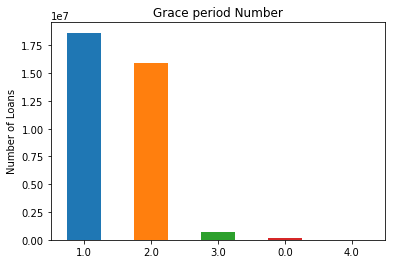

Top  -1  counts:  
 1.0    18644472
2.0    15941231
3.0      679018
0.0      181727
4.0        3427
Name: graceperiodnumber, dtype: int64


In [215]:
draw(df.graceperiodnumber, title='Grace period Number', ylabel='Number of Loans', sort = True)

In [216]:
df.graceperiodnumber.describe()

count    3.544989e+07
mean     1.483157e+00
std      5.466821e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.000000e+00
Name: graceperiodnumber, dtype: float64

In [217]:
df.groupby([df.reportingperiodendingdate]).graceperiodnumber.mean()

reportingperiodendingdate
2017-12-31    1.496724
2018-01-31    1.497502
2018-02-28    1.487757
2018-03-31    1.482648
2018-04-30    1.481365
2018-05-31    1.476920
2018-06-30    1.481595
2018-07-31    1.480238
2018-08-31    1.479264
2018-09-30    1.476830
Name: graceperiodnumber, dtype: float64

### Number of loans with zero grace period

In [218]:
u=pd.value_counts(df.graceperiodnumber==0)
if len(u)<2:
    print('No blank or zero grace period number')
else: 
    print('Number of loans with zero grace period number',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive grace period number')
    #df=df[df.graceperiodnumber>0]
df.shape

Number of loans with zero grace period number : 181727


(35449886, 96)

### Asset added indicator...not included

Indicate yes or no whether the asset was added during the
reporting period. Instruction: A response to this data point
is only required when assets are added to the asset pool
after the final prospectus is filed

In [219]:
df['assetaddedindicator']=df.assetaddedindicator.astype('category')

In [224]:
df.assetaddedindicator.unique()

[False, NaN, True]
Categories (2, object): [False, True]

In [220]:
df.assetaddedindicator.isna().mean()

0.1648792890335388

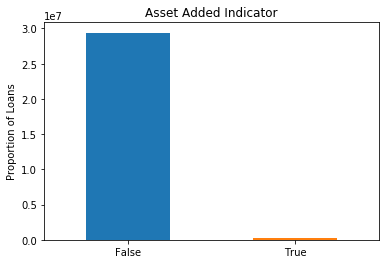

Top  2  counts:  
 False    29397111
True       207823
Name: assetaddedindicator, dtype: int64


In [221]:
draw(df.assetaddedindicator, title='Asset Added Indicator', ylabel='Proportion of Loans', sort = False, n=2)

In [222]:
df.assetaddedindicator.describe()

count     29604934
unique           2
top          False
freq      29397111
Name: assetaddedindicator, dtype: object

In [223]:
u=pd.value_counts(df.assetaddedindicator!=False)
if len(u)<2:
    print('No blank or zero Asset Added Indicator')
else: 
    print('Number of loans with zero or blank Asset Added Indicator',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive asset added indicator')
    #df=df[df.assetaddedindicator>0]
df.shape

Number of loans with zero or blank Asset Added Indicator : 6052775


(35449886, 96)

In [225]:
df.groupby([df.reportingperiodendingdate, df.assetaddedindicator]).currentdelinquencystatus.mean()

reportingperiodendingdate  assetaddedindicator
2017-12-31                 False                  1.720265
2018-01-31                 False                  1.778555
                           True                   0.855277
2018-02-28                 False                  1.467285
2018-03-31                 False                  1.341760
2018-04-30                 False                  1.417374
                           True                   0.664184
2018-05-31                 False                  1.474006
2018-06-30                 False                  1.421070
                           True                   0.798250
2018-07-31                 False                  1.584687
2018-08-31                 False                  1.544107
2018-09-30                 False                  1.606784
Name: currentdelinquencystatus, dtype: float64

In [226]:
df.groupby([df.reportingperiodendingdate, df.assetaddedindicator]).obligorcreditscore.mean()

reportingperiodendingdate  assetaddedindicator
2017-12-31                 False                  727.328950
2018-01-31                 False                  731.036107
                           True                   722.299597
2018-02-28                 False                  732.054428
2018-03-31                 False                  729.441996
2018-04-30                 False                  729.744221
                           True                   722.370713
2018-05-31                 False                  731.757402
2018-06-30                 False                  729.929173
                           True                   722.073993
2018-07-31                 False                  730.388512
2018-08-31                 False                  732.119041
2018-09-30                 False                  731.001970
Name: obligorcreditscore, dtype: float64

In [227]:
df.drop(['assetaddedindicator'], axis=1, inplace=True)
df.shape

(35449886, 95)

### Reporting Period Modification Indicator

Indicates yes or no whether the loan was modified from its
original terms during the reporting period.

In [228]:
df.reportingperiodmodificationindicator.isna().mean()

0.10597337322890121

In [229]:
df['reportingperiodmodificationindicator']=df.reportingperiodmodificationindicator.astype('category')

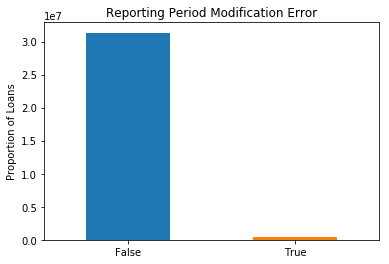

Top  -1  counts:  
 False    31329170
Name: reportingperiodmodificationindicator, dtype: int64


In [230]:
draw(df.reportingperiodmodificationindicator, title='Reporting Period Modification Error', ylabel='Proportion of Loans', sort = True)

In [231]:
df.reportingperiodmodificationindicator.describe()

count     31693142
unique           2
top          False
freq      31329170
Name: reportingperiodmodificationindicator, dtype: object

In [232]:
df.groupby([df.reportingperiodendingdate, df.reportingperiodmodificationindicator]).currentdelinquencystatus.mean()

reportingperiodendingdate  reportingperiodmodificationindicator
2017-12-31                 False                                   2.956432
                           True                                    2.038055
2018-01-31                 False                                   2.939996
                           True                                    2.005376
2018-02-28                 False                                   2.611013
                           True                                    2.810108
2018-03-31                 False                                   2.293791
                           True                                    2.739001
2018-04-30                 False                                   2.441978
                           True                                    2.385896
2018-05-31                 False                                   2.579617
                           True                                    2.312297
2018-06-30              

In [233]:
df.groupby([df.reportingperiodendingdate, df.reportingperiodmodificationindicator]).obligorcreditscore.mean()

reportingperiodendingdate  reportingperiodmodificationindicator
2017-12-31                 False                                   705.068602
                           True                                    599.457197
2018-01-31                 False                                   707.191274
                           True                                    597.514646
2018-02-28                 False                                   709.306699
                           True                                    600.815026
2018-03-31                 False                                   707.659333
                           True                                    594.887554
2018-04-30                 False                                   705.321336
                           True                                    590.610716
2018-05-31                 False                                   707.419746
                           True                                    603.204016


### Create Features for Reporting Period Modification Indicator True

In [234]:
def map_reportingperiodmodificationindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['reportingperiodmodificationindicator_true'] = list(map(map_reportingperiodmodificationindicator_true, df.reportingperiodmodificationindicator))
print('Added Column for :   reportingperiodmodificationindicator_true')
df.drop(['reportingperiodmodificationindicator'], axis=1, inplace=True)
pd.value_counts(df.reportingperiodmodificationindicator_true)

Added Column for :   reportingperiodmodificationindicator_true


0    35085914
1      363972
Name: reportingperiodmodificationindicator_true, dtype: int64

In [235]:
df.shape

(35449886, 95)

### Servicing Advance Method Code...revealing default status!

Specify the code that indicates a servicer's responsibility for
advancing principal or interest on delinquent loans. 1: No
advancing, 2: Interest only, 3: Principal only, 4: Principal and
Interest, 99: Unavailable

In [236]:
df.servicingadvancemethodcode.isna().mean()

0.0

In [239]:
df['servicingadvancemethodcode']=df.servicingadvancemethodcode.astype('category')

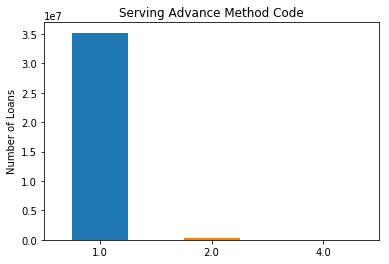

Top  100  counts:  
 1.0    35196652
2.0      241552
4.0       11682
Name: servicingadvancemethodcode, dtype: int64


In [240]:
draw(df.servicingadvancemethodcode, title='Serving Advance Method Code', ylabel='Number of Loans', sort = True, n=100)

In [241]:
df.servicingadvancemethodcode.describe()

count     35449886.0
unique           3.0
top              1.0
freq      35196652.0
Name: servicingadvancemethodcode, dtype: float64

In [242]:
df.groupby([df.reportingperiodendingdate, df.servicingadvancemethodcode]).obligorcreditscore.mean()

reportingperiodendingdate  servicingadvancemethodcode
2017-12-31                 1.0                           706.254010
                           2.0                           699.196627
2018-01-31                 1.0                           707.991050
                           2.0                           699.316326
                           4.0                           726.029805
2018-02-28                 1.0                           710.201705
                           2.0                           699.458151
                           4.0                           730.035153
2018-03-31                 1.0                           708.506632
                           2.0                           699.457671
                           4.0                           721.573279
2018-04-30                 1.0                           706.146216
                           2.0                           699.603782
                           4.0                           720.5

In [243]:
df.groupby([df.reportingperiodendingdate, df.servicingadvancemethodcode]).currentdelinquencystatus.mean()

reportingperiodendingdate  servicingadvancemethodcode
2017-12-31                 1.0                            2.738764
                           2.0                            3.500343
2018-01-31                 1.0                            2.732158
                           2.0                            3.386627
                           4.0                           11.043165
2018-02-28                 1.0                            2.441909
                           2.0                            2.912211
                           4.0                            8.364248
2018-03-31                 1.0                            2.138944
                           2.0                            2.812255
                           4.0                           11.250202
2018-04-30                 1.0                            2.274505
                           2.0                            3.048965
                           4.0                           10.652632
2018-05-

### Create Feature Columns for Servicing Advance Method Codes

In [244]:
def map_servicingadvancemethodcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.servicingadvancemethodcode).index.tolist()

for code in codes:
        df['servicingadvancemethod_code_{}'.format(code)] = list(map(map_servicingadvancemethodcode, df.servicingadvancemethodcode))
        print('Added Column for :   servicingadvancemethod_code_'+str(code))
df.drop(['servicingadvancemethodcode'], axis=1, inplace=True)
df.shape

Added Column for :   servicingadvancemethod_code_1.0
Added Column for :   servicingadvancemethod_code_2.0
Added Column for :   servicingadvancemethod_code_4.0


(35449886, 97)

### Other Principal Adjustment Amount...negative amt?

Indicate any other amounts that caused the principal balance of the loan to be decreased or increased during the reporting period.

In [245]:
df.otherprincipaladjustmentamount.isna().mean()

0.0005389298007897684

In [246]:
df.otherprincipaladjustmentamount.describe()

count    3.543078e+07
mean    -6.716046e+00
std      4.356119e+02
min     -7.466276e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.797659e+04
Name: otherprincipaladjustmentamount, dtype: float64

In [247]:
u=pd.value_counts(df.otherprincipaladjustmentamount<=0)
if len(u)<2:
    print('No blank other principal adjustment amount')
else: 
    print('Number of loans with zero or negative principal adjustment amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with other principal adjustment amount')
    #df=df[df.otherprincipaladjustmentamount>0]
df.shape

Number of loans with zero or negative principal adjustment amount : 35221307


(35449886, 97)

### Zero Balance Effective Date..check correlation with target(current)

Provide the date on which the loan balance was reduced to
zero.

In [248]:
df.zerobalanceeffectivedate.isna().mean()

0.9998942450759927

In [249]:
df.zerobalanceeffectivedate.describe()

count           3749
unique            13
top       2018-01-31
freq             467
Name: zerobalanceeffectivedate, dtype: object

### Adding new features for Days to Zero Balance Effective Date from Origination Date

In [250]:
for i in pd.value_counts(df.zerobalanceeffectivedate).keys().tolist():
    if i>cutOffForOriginationDate:
        df['zerobalanceeffectivedate_calc'] = pd.to_datetime(df['zerobalanceeffectivedate'])-pd.to_datetime(df['originationdate'])
df['zerobalanceeffectivedate_calc']=df.zerobalanceeffectivedate_calc.map(lambda x: np.nan if pd.isnull(x) else x.days)
print('Added Column for :   zerobalanceeffectivedate_calc')
#df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

Added Column for :   zerobalanceeffectivedate_calc


In [251]:
df.zerobalanceeffectivedate_calc.describe()

count    3749.000000
mean      732.100293
std       498.001832
min        31.000000
25%       395.000000
50%       638.000000
75%       943.000000
max      2344.000000
Name: zerobalanceeffectivedate_calc, dtype: float64

In [252]:
df.zerobalanceeffectivedate_calc.fillna(0, inplace=True)

In [253]:
df.zerobalanceeffectivedate_calc.isna().mean()

0.0

In [254]:
df.drop(['zerobalanceeffectivedate'], axis=1, inplace=True)
df.shape

(35449886, 97)

### Zero Balance Code..correlation with being current

Provide the code that indicates the reason the loan's
balance was reduced to zero. 1: Prepaid or Matured, 2:
Third-party Sale, 3: Repurchased or Replaced, 4: Chargedoff,
5: Servicing Transfer, 99: Unavailable

In [255]:
df.zerobalancecode.isna().mean()

0.0

In [257]:
df['zerobalancecode']=df.zerobalancecode.astype('category')

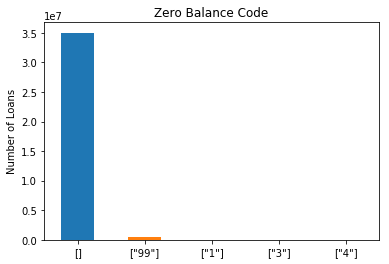

Top  100  counts:  
 []        35010664
["99"]      435473
["1"]         2599
["3"]          697
["4"]          453
Name: zerobalancecode, dtype: int64


In [258]:
draw(df.zerobalancecode, title='Zero Balance Code', ylabel='Number of Loans', sort = True, n=100)

### Create feature column for zero balance code

In [259]:
def map_zerobalancecode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.zerobalancecode).index.tolist()

for code in codes:
        df['zerobalance_{}'.format(code)] = list(map(map_zerobalancecode, df.zerobalancecode))
        print('Added Column for :   zerobalance_'+code)
df.drop(['zerobalancecode'], axis=1, inplace=True)
df.shape

Added Column for :   zerobalance_[]
Added Column for :   zerobalance_["99"]
Added Column for :   zerobalance_["1"]
Added Column for :   zerobalance_["3"]
Added Column for :   zerobalance_["4"]


(35449886, 101)

## Add External S&P Experian default index and historical data

In [260]:
df=df.set_index('reportingperiodendingdate')

In [261]:
df1=pd.read_csv(path+'datasets/s&pExperianAutoDefaultIndex.csv', index_col=0)
df=df.join(df1)
df2=pd.read_csv(path+'datasets/experianHistDefaultRates.csv', index_col=0)
df=df.join(df2)

In [262]:
df.head()

,cik,assetnumber,reportingperiodbeginningdate,originationdate,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,...,"zerobalance_[""99""]","zerobalance_[""1""]","zerobalance_[""3""]","zerobalance_[""4""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex
2017-12-31,1708978,6345701,2017-12-01,2013-11-30,13786.00,72.0,0.2499,1.0,570.0,0.138530,...,0,0,0,0,0.0107,1.1,3.44,0.68,1.22,0.91
2017-12-31,1708978,6346124,2017-12-01,2013-10-31,16699.00,60.0,0.2100,2.0,629.0,0.114215,...,0,0,0,0,0.0107,1.1,3.44,0.68,1.22,0.91
2017-12-31,1708978,1006584,2017-12-01,2012-05-31,18099.08,72.0,0.2499,1.0,549.0,0.147130,...,0,0,0,0,0.0107,1.1,3.44,0.68,1.22,0.91
2017-12-31,1708978,1007110,2017-12-01,2012-05-31,15276.82,72.0,0.1823,1.0,574.0,0.125689,...,0,0,0,0,0.0107,1.1,3.44,0.68,1.22,0.91
2017-12-31,1708978,1012580,2017-12-01,2012-05-31,15843.94,72.0,0.2049,1.0,589.0,0.129100,...,0,0,0,0,0.0107,1.1,3.44,0.68,1.22,0.91


In [263]:
df.drop(['cik', 'assetnumber', 'reportingperiodbeginningdate','originationdate'], axis=1, inplace=True)
df.shape        

(35449886, 102)

# Clean data

In [ ]:
# change columns to lower case and remove prefix to enable pandas to work
#column_list=[x.lower() for x in (column_list)]
#df.columns=df.columns.str.replace('abs_loan.','')
# convert objects to numeric
#df=df.convert_objects(convert_numeric=True)

# Check for null

In [264]:
df.isnull().values.any()

True

# Loan Statistics

In [ ]:
df.describe()

## Deliquency Buckets Current Vs Non-Current

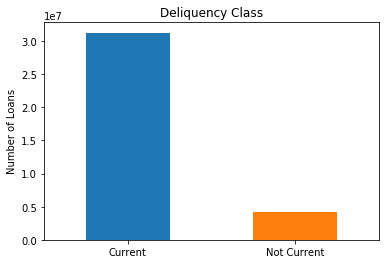

Number of loans Current : 31272609     Number of loans Not Current : 4177277


In [265]:
LABELS = ('Current', 'Not Current')
count_classes = pd.value_counts(df.currentdelinquencystatus>0, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Not Current :', count_classes[1],)

In [266]:
df.currentdelinquencystatus.describe()

count    3.544989e+07
mean     2.568253e+00
std      1.027237e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.780000e+02
Name: currentdelinquencystatus, dtype: float64

In [267]:
df.currentdelinquencystatus.isna().mean()

0.0

In [268]:
u=pd.value_counts(df.currentdelinquencystatus==''.index) 
if len(u)<2:
    print('No blank current delinquency status')
else: 
    print('Number of loans with blank current delinquency status',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

No blank current delinquency status


(35449886, 102)

## Label Creation for Machine Learning

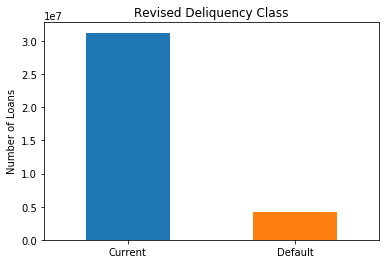

Number of loans Current : 31272609     Number of loans Defaulted : 4177277


In [269]:
def map_label(*args):
    columns = [col for col in args]
    for column in columns:
        if column > 0:
            return 1
        elif column == 0:
            return 0
        
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.label, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Revised Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

### Loan Balance Amount at the End of Reporting Period

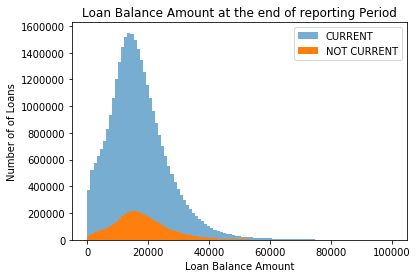

In [270]:
current_df = df[df.label==0]
not_current_df = df[df.label==1]
bins = np.linspace(0, 100000, 100)
plt.hist(current_df.reportingperiodactualendbalanceamount, bins, alpha=0.6, 
         #density=True, 
         label='CURRENT')
plt.hist(not_current_df.reportingperiodactualendbalanceamount, bins, alpha=1, 
         #density=True, 
         label='NOT CURRENT')
plt.legend(loc='upper right')
plt.title("Loan Balance Amount at the end of reporting Period")
plt.xlabel('Loan Balance Amount')
plt.ylabel('Number of of Loans')
plt.show()

### Manual oversampling of default data 

In [ ]:
# #def manual_oversampling(df):
# default=df[df.label==1]
# print('default: ',default.shape)
# b=int((df.shape[0]-default.shape[0])/(default.shape[0]))
# print('copy default data ',b, ' times')
# b=int(b*manualOversamplingFactor)
# print(b)
# for i in range(b):
#     df=df.append(default, ignore_index=True)
# df=df.sample(frac=1).reset_index(drop=True)
# draw(df.label, title='Manual Oversampling -Current Vs Non-Current', ylabel='Number of Loans', sort=True)
# print(df.shape)
# print(pd.value_counts(df.label==1))
# #return df
   

In [ ]:
# #manual_oversampling(df)
# print(pd.value_counts(df.label==1))
# df.shape

In [ ]:
#df.dtypes

### Oversampling with SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
# #Apply SMOTE to create synthetic observations from minority class
# #Source:https://github.com/scikit-learn-contrib/imbalanced-learn
# from imblearn.over_sampling import SMOTE #Over sampling
# sm = SMOTE(ratio='auto',kind='regular')
# X_sampled,y_sampled = sm.fit_sample(X,y.values.ravel())

# #Percentage of fraudlent records in original data
# Source_data_no_fraud_count = len(data[data.Class==0])
# Source_data_fraud_count = len(data[data.Class==1])
# print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

# #Percentage of fraudlent records in sampled data
# Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
# Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
# print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

### Naive Random Oversampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# from collections import Counter
# print(sorted(Counter(y_resampled).items()))

#  Clean up for Machine Learning

In [ ]:
df.isnull().any()

In [271]:
df.isnull().any().sum()

13

In [272]:
pd.value_counts(df.label, dropna=False)

0    31272609
1     4177277
Name: label, dtype: int64

Dropping NaN rows for the label(current Vs Non-current)

In [273]:
df.label.dropna(inplace=True)

In [274]:
pd.value_counts(df.label, dropna=False)

0    31272609
1     4177277
Name: label, dtype: int64

In [275]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

 0.00    454404
NaN       63663
 0.05     33626
 0.04     30778
 0.06     30159
Name: paymenttoincomepercentage, dtype: int64

Dropping NaN rows for payment to income percentage

In [276]:
df.paymenttoincomepercentage.dropna(inplace=True)

In [277]:
pd.value_counts(df.paymenttoincomepercentage, dropna=False).head()

0.00    454404
0.05     33626
0.04     30778
0.06     30159
0.07     25911
Name: paymenttoincomepercentage, dtype: int64

In [278]:
df['servicingflatfeeamount']=df.servicingflatfeeamount.astype('float')
pd.value_counts(df.servicingflatfeeamount, dropna=False) 

NaN     31033955
 0.0     4415931
Name: servicingflatfeeamount, dtype: int64

Populating blank servicing flat fee amount with zeros

In [279]:
df.servicingflatfeeamount.fillna(0,inplace=True)

In [280]:
pd.value_counts(df.reportingperiodbeginningloanbalanceamount, dropna=False).head()

NaN         24401
 0.0         8041
 10000.0     2101
 12000.0     1840
 15000.0     1675
Name: reportingperiodbeginningloanbalanceamount, dtype: int64

Populate blank rows of reporting period beginning loan balance amount with zeros

In [281]:
df.reportingperiodbeginningloanbalanceamount.fillna(0, inplace=True)

In [282]:
pd.value_counts(df.reportingperiodbeginningloanbalanceamount, dropna=False).head()

0.0        32442
10000.0     2101
12000.0     1840
15000.0     1675
14000.0     1653
Name: reportingperiodbeginningloanbalanceamount, dtype: int64

In [283]:
pd.value_counts(df.otherservicerfeeretainedbyservicer, dropna=False).head()

NaN      31033955
 0.0      4411351
 15.0          91
 30.0          37
 20.0          29
Name: otherservicerfeeretainedbyservicer, dtype: int64

Populate blank other servicer fee retained by servicer with zeros

In [284]:
df.otherservicerfeeretainedbyservicer.fillna(0, inplace=True)

In [285]:
pd.value_counts(df.otherservicerfeeretainedbyservicer, dropna=False).head()

0.0     35445306
15.0          91
30.0          37
20.0          29
45.0          21
Name: otherservicerfeeretainedbyservicer, dtype: int64

In [286]:
pd.value_counts(df.serviceradvancedamount, dropna=False).head()

NaN      24450361
 0.00    10957548
 1.97           9
 5.41           8
 0.67           8
Name: serviceradvancedamount, dtype: int64

Populate blank servicer advance amount with zeros

In [287]:
df.serviceradvancedamount.fillna(0, inplace=True)

In [288]:
pd.value_counts(df.serviceradvancedamount, dropna=False).head()

0.00    35407909
1.97           9
5.41           8
0.67           8
1.93           8
Name: serviceradvancedamount, dtype: int64

In [289]:
df.isnull().any()

originalloanamount                           False
originalloanterm                             False
originalinterestratepercentage               False
graceperiodnumber                            False
obligorcreditscore                           False
paymenttoincomepercentage                     True
reportingperiodbeginningloanbalanceamount    False
nextreportingperiodpaymentamountdue           True
reportingperiodinterestratepercentage         True
nextinterestratepercentage                    True
servicingfeepercentage                       False
servicingflatfeeamount                       False
otherservicerfeeretainedbyservicer           False
otherassesseduncollectedservicerfeeamount     True
scheduledinterestamount                       True
scheduledprincipalamount                      True
otherprincipaladjustmentamount                True
reportingperiodactualendbalanceamount        False
reportingperiodscheduledpaymentamount         True
totalactualamountpaid          

In [290]:
df.fillna(0, inplace=True)

In [291]:
df.isnull().any().sum()

0

In [292]:
df.dropna(inplace=True)

In [293]:
df.shape 

(35449886, 103)

In [294]:
df.dtypes

originalloanamount                           float64
originalloanterm                             float64
originalinterestratepercentage               float64
graceperiodnumber                            float64
obligorcreditscore                           float64
paymenttoincomepercentage                    float64
reportingperiodbeginningloanbalanceamount    float64
nextreportingperiodpaymentamountdue          float64
reportingperiodinterestratepercentage        float64
nextinterestratepercentage                   float64
servicingfeepercentage                       float64
servicingflatfeeamount                       float64
otherservicerfeeretainedbyservicer           float64
otherassesseduncollectedservicerfeeamount    float64
scheduledinterestamount                      float64
scheduledprincipalamount                     float64
otherprincipaladjustmentamount               float64
reportingperiodactualendbalanceamount        float64
reportingperiodscheduledpaymentamount        f

# Feature Engineering

1. Missing Values
2. Standard Deviation- Amount of Variation
3. Pairwise Correlation
4. Multi Co-linearity
5. Correlation with the labels
6. Cluster Analysis/Dimensionality Reduction


### 1. Missing Values

In [ ]:
df.isnull().any().sum()

### 2. Standard Deviation - Amount of Variation

In [ ]:
df.std()

### 3. Pairwise Correlation

In [295]:
corr=df.corr()

In [296]:
corr.to_csv(path+'datasets/corr_prod.csv')

In [ ]:
#plt.matshow(df.corr(), figsize=(20,10))
plt.matshow(df.corr())

In [ ]:
corr.shape

In [ ]:
corr.isna().mean().sum()

In [ ]:
corr.fillna(0, inplace=True)

In [ ]:
corr.isna().mean().sum()

In [ ]:
plt.matshow(corr)

### 4. Correlation with Labels

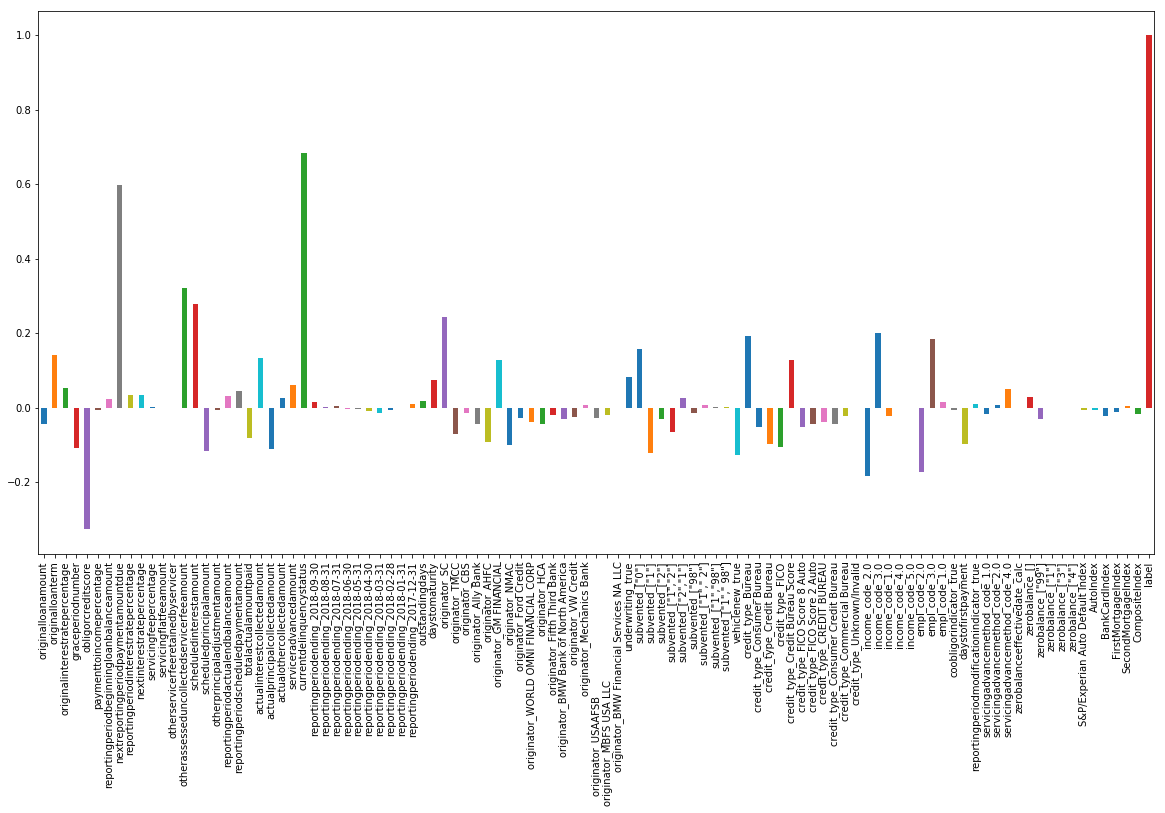

In [297]:
corr.label.plot(kind='bar', figsize=(20,10))

### 5 Check for muti co-linearity

In [299]:
eigenvalue, eigenvector = np.linalg.eig(corr)

LinAlgError: Array must not contain infs or NaNs

In [298]:
np.savetxt(path+'datasets/eigenvalue_prod.csv', eigenvalue, delimiter=",")
np.savetxt(path+'datasets/eigenvector_prod.csv', eigenvector, delimiter=",")

NameError: name 'eigenvalue' is not defined

In [ ]:
evector=pd.DataFrame(eigenvector, columns=corr.columns.tolist())
evector

## Feature Selection

Why select features?
1. Some algorithms scale (computationally) poorly with increased dimension
2. Irrelevant features can confuse some algorithms
3. Redundant features adversely affect regularization
4. Removal of features can increase generalization)

#### Feature Selection Methods
1. Agnostic
    Preprocessing based methods 
        - Remove a binary feature if 'True' in very few or most samples
2. Filter Feature Selection methods
        - Use some ranking criteria to rank
        - Select the top ranking features
3. Wrapper Methods (keep the learning algorithm in the loop)
        - Requires repeated runs of the learning algorithm with different set of features
        - Can be computationally expensive
4. Heuristics 
        - much faster than wrapper methods
5. Correlation Critera
        - Rank features in order of their correlation with the labels
6. Forward Search, Backward Search and step-wise search
        -Forward Search
            Start with no features
            Greedily include the most relevant feature
            Stop when selected the desired number of features
        - Backward Search
            Start with all the features
            Greedily remove the least relevant feature
            Stop when selected the desired number of features
        - Stepwise
            -reevauate all features after each forward search
            -Any feature can be removed after each step
  

#### 4. Huristics 

#### BIC and AIC
Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. 
They are used for choosing best features and often used for comparing nonnested models, which ordinary statistical tests cannot do. The AIC or BIC for a model is usually written in the form [-2logL + kp], where L is the likelihood function, p is the number of parameters in the model, and k is 2 for AIC and log(n) for BIC. In our case, we do not require AIC and BIC techniques for finding the best features due to the simplicity of our model and the number of features being less than 100.

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. 
AIC is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model, so that a lower AIC means a model is considered to be closer to the truth. BIC is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup, so that a lower BIC means that a model is considered to be more likely to be the true model. Both criteria are based on various assumptions and asymptotic approximations. Each, despite its heuristic usefulness, has therefore been criticized as having questionable validity for real world data. But despite various subtle theoretical differences, their only difference in practice is the size of the penalty; BIC penalizes model complexity more heavily. The only way they should disagree is when AIC chooses a larger model than BIC.

### Feature Union

It is beneficial to combine several methods to obtain good performance. We use FeatureUnion to combine features obtained by PCA and univariate selection.
Combining features using this transformer has the benefit that it allows cross validation and grid searches over the whole process.

In [ ]:
y=df.label.values
x=df.values

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
# If dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
x_features = combined_features.fit(x, y).transform(x)
print("Combined space has", x_features.shape[1], "features")

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=10)
grid_search.fit(x, y)
print(grid_search.best_estimator_)

### Save the dataframe

In [301]:
df.to_csv(path+"prod/processed_abs_loans_prod_Dec_to_Sep.csv", chunksize=10000)

### Preparing data for Machine Learning

In [ ]:
# prepare label for scikit-learn
Y=df.label.values
Y.shape

In [ ]:
# reshape labels for machine learning
Y=Y.reshape(Y.shape[0],1)
Y.shape

In [ ]:
# prepare input data for scikit-learn
input=df.values
input.shape

In [ ]:
# calculate train/test split
len_train = int(len(input)*train_split)
print(len_train)

In [ ]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]

In [ ]:
#reshape input data for machine learning
input=input.reshape(input.shape[0], input.shape[1], 1)
input.shape

In [ ]:
# apply train/test split to input data
x_train = input[0:len_train]
x_test = input[len_train:]
x_train.shape

### Scikit-Learn Scaling

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

In [ ]:
# x_scaler=StandardScaler()
# x_train = x_scaler.fit_transform(x_train)
# x_test = x_scaler.fit_transform(x_test)

### Keras Scaling - Normalize

In [ ]:
# x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
# x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
# x_train_keras_scaled.shape

### Linear Support Vector Machine Algorithm

Linear Support Vector Classification.
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [ ]:
# from sklearn import svm, neighbors
# lsvc=svm.LinearSVC()
# clf_lsvc=lsvc.fit(x_train, y_train)
# confidence_lsvc=clf_lsvc.score(x_test, y_test)

In [ ]:
### K-Nearest Neighbors Algorithm

In [ ]:
# knn=neighbors.KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
# clf_knn=knn.fit(x_train, y_train)
# confidence_knn=clf_knn.score(x_test, y_test)

### Random Forest Tree Algorithm

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set

In [ ]:
# rfor=RandomForestClassifier()
# clf_rfor = rfor.fit(x_train, y_train)
# confidence_rfor=clf_rfor.score(x_test, y_test)

### Logistic Regression Algorithm

In [ ]:
# lr = LogisticRegression(solver='lbfgs')
# clf_lr = lr.fit(x_train, y_train)
# confidence_lr=clf_lr.score(x_test, y_test)

### Gaussian Naive Bayes Algorithm

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# clf_gnb = gnb.fit(x_train, y_train)
# confidence_gnb=clf_gnb.score(x_test, y_test)

### Deep Learning - GRU

In [ ]:

# model = keras.Sequential()
# model.add(keras.layers.GRU(128, activation='relu',  
#                            kernel_regularizer=regularizers.l2(0.01), 
#                            input_shape=(x_train_keras_scaled.shape[1:]), 
#                            return_sequences=True))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.GRU(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.Dense(8, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
# model.add(keras.layers.Dropout(0.3))

# model.add(keras.layers.Dense(2, activation='softmax'))

# optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)
# model.summary()

### Model Configuration

In [ ]:
#save the best model
#keras.callbacks.Callback()
# checkPoint = ModelCheckpoint(filepath = path+'model/'+name+'.h5',
#                             save_best_only = True,
#                             verbose=0)
# tensorboard = TensorBoard(log_dir=path+'logs/{}'.format(name),
#                           histogram_freq=0,
#                           batch_size=32,
#                           write_graph=True,
#                           write_images=False)
# history = keras.callbacks.History()

### Train the Model

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test_keras_scaled, y_test), batch_size=8192, 
#         # callbacks = [
#    # baseLogger,
#     #history,
#     #tensorboard
#     #learningRateScheduler,
#     #reduceLROnPlateau
#      #    ], 
#           shuffle=False
# )


### Save the Model

In [ ]:
# model.save(path+'model/'+name+'.h5')

In [ ]:
# test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

In [ ]:
# y_pred = model.predict_classes(x_test)

In [ ]:
#print(y_pred)

In [ ]:
#len(y_pred)

In [ ]:
# np.count_nonzero(y_pred)

In [ ]:
# np.count_nonzero(y_test)

### Load Saved Model

In [ ]:
#saved_model = load_model(path+'model/ABS_Keras-GRU254GRU128D32D2-adam1540234475.h5')

In [ ]:
# test_loss, test_acc = saved_model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

### Predict Classes

In [ ]:
x_pred = x_test

In [ ]:
# prediction_gru = model.predict_classes(x_pred)
# prediction_lsvc = clf_lsvc.predict(x_pred)
# prediction_knn = clf_knn.predict(x_pred)
# prediction_rfor = clf_rfor.predict(x_pred)
# prediction_lr = clf_lr.predict(x_pred)
# prediction_gnb = clf_gnb.predict(x_pred)

In [ ]:
# predictions = [
#   prediction_gru,
#     prediction_lsvc,
#     prediction_knn,
#     prediction_rfor,
#     prediction_lr,
#     prediction_gnb 
]

### Confusion Matrix

In [ ]:
# class_names = ['Current', 'Non-Current']

# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.tight_layout()

# for prediction in predictions:
#         print('ROC_AUC_SCORE ; ', roc_auc_score(y_test, prediction))
#         # Compute confusion matrix
#         cnf_matrix = confusion_matrix(y_test, prediction)
#         np.set_printoptions(precision=2)

#         # Plot non-normalized confusion matrix
#         plt.figure()
#         plot_confusion_matrix(cnf_matrix, classes=class_names,
#                           title= 'Confusion matrix')

#         # Plot normalized confusion matrix
# #         plt.figure()
# #         plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
# #                           title='Normalized confusion matrix')

#         plt.show()